## read data

In [1]:
import sklearn
import numpy as np
import flask

In [2]:
sklearn.__version__,np.__version__,flask.__version__

('1.2.1', '1.24.3', '2.2.2')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("datasets/Cars.csv")

In [5]:
df.shape

(8128, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# show missing data percentage
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total    %
torque       222  2.7
mileage      221  2.7
engine       221  2.7
seats        221  2.7
max_power    215  2.6

In [8]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

### rename column

In [9]:
col_list = df.columns

In [10]:
rename_list = {h:h.lower() for h in col_list}

In [11]:
# rename columns
df.rename(rename_list, inplace = True)

In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### clean data

In [13]:
# remove CNG and LPG row
# df = df.drop(df[df['fuel'] == 'LPG' ].index)
# df = df.drop(df[df['fuel'] == 'CNG' ].index)
df = df[df.fuel.isin(['LPG','CNG']) == False]

In [14]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [15]:
# rename brand
df['brand'] = df['name'].apply(lambda x: x.split(" ")[0].lower())

In [16]:
df = df.drop(columns=['name'])

In [17]:
df['brand'].value_counts()

maruti           2378
hyundai          1393
mahindra          772
tata              733
toyota            488
honda             467
ford              397
chevrolet         228
renault           228
volkswagen        186
bmw               120
skoda             105
nissan             81
jaguar             71
volvo              67
datsun             65
mercedes-benz      54
fiat               47
audi               40
lexus              34
jeep               31
mitsubishi         14
force               6
land                6
isuzu               5
kia                 4
ambassador          4
daewoo              3
mg                  3
ashok               1
opel                1
peugeot             1
Name: brand, dtype: int64

In [18]:
print(df['brand'].unique())
# it is too many brand

['maruti' 'skoda' 'honda' 'hyundai' 'toyota' 'ford' 'renault' 'mahindra'
 'tata' 'chevrolet' 'fiat' 'datsun' 'jeep' 'mercedes-benz' 'mitsubishi'
 'audi' 'volkswagen' 'bmw' 'nissan' 'lexus' 'jaguar' 'land' 'mg' 'volvo'
 'daewoo' 'kia' 'force' 'ambassador' 'ashok' 'isuzu' 'opel' 'peugeot']


In [19]:
# convert max power to float
df['max_power'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)

In [20]:
# drop column torque
df = df.drop(columns=['torque'])
# Convert torque to power  P = Torque x Rpm
# extract torque and rpm unit (Torque: kgm,Nm,nm) (rpm)
# extract value *some value is period 
# ex 22.4 kgm at 1750-2750rpm, 22.4 kgm at 1750-2750rpm
# df['torque'] = df['torque'].str.extract(r'([\d.]+)').astype(float)

In [21]:
# Convert engine capacity to liters
df['engine'] = df['engine'].str.extract('(\d+)').astype(float).astype(pd.Int64Dtype(), errors='ignore')

In [22]:
df['mileage'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)

In [23]:
# cleaned data
df[:5]

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats    brand  
0   First Owner    23.40    1248      74.00    5.0   maruti  
1  Second Owner    21.14    1498     103.52    5.0    skoda  
2   Third Owner    17.70    1497      78.00    5.0    honda  
3   First Owner    23.00    1396      90.00    5.0  hyundai  
4   First Owner    16.10    1298      88.20    5.0   maruti

In [24]:
# df['selling_price'] = np.log(df['selling_price'])

## Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [26]:
df.describe()

year  selling_price     km_driven      mileage       engine  \
count  8033.000000   8.033000e+03  8.033000e+03  7819.000000       7819.0   
mean   2013.818748   6.427361e+05  6.973882e+04    19.390375  1463.090677   
std       4.031655   8.098635e+05  5.664361e+04     4.001777   504.655439   
min    1983.000000   2.999900e+04  1.000000e+03     0.000000        624.0   
25%    2011.000000   2.600000e+05  3.500000e+04    16.780000       1197.0   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000       1248.0   
75%    2017.000000   6.800000e+05  9.800000e+04    22.320000       1582.0   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000       3604.0   

         max_power        seats  
count  7825.000000  7819.000000  
mean     91.864733     5.421281  
std      35.846839     0.962876  
min       0.000000     2.000000  
25%      69.000000     5.000000  
50%      82.400000     5.000000  
75%     102.000000     5.000000  
max     400.000000    14.000000

In [27]:
df[:5]

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats    brand  
0   First Owner    23.40    1248      74.00    5.0   maruti  
1  Second Owner    21.14    1498     103.52    5.0    skoda  
2   Third Owner    17.70    1497      78.00    5.0    honda  
3   First Owner    23.00    1396      90.00    5.0  hyundai  
4   First Owner    16.10    1298      88.20    5.0   maruti

### distribution

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def displot_list(mcon_col,df):
    # Calculate the number of rows needed for the subplots
    num_rows = (len(mcon_col) + 1) // 2  # +1 to handle odd number of columns

    # Create a figure with the desired number of rows and 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 16))
    axes = axes.flatten()

    # Iterate through columns and create plots
    for idx, col in enumerate(mcon_col):
        ax = axes[idx]
        p = sns.histplot(data=df, x=col, ax=ax)  # Using histplot instead of displot for better control
        
        # Calculate mean and median
        mean = df[col].mean()
        median = df[col].median()

        # Add vertical lines for mean and median
        p.axvline(mean, color='red', linestyle='dashed', label='Mean')
        p.axvline(median, color='yellow', linestyle='dashed', label='Median')
        
        # Set plot title
        p.set_title(f'{col} Distribution')
        
        # Set legend
        p.legend()
        
    # Remove any unused subplots
    for i in range(len(mcon_col), num_rows * 2):
        fig.delaxes(axes[i])
        
    # Adjust layout
    plt.tight_layout()
    plt.show()


c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


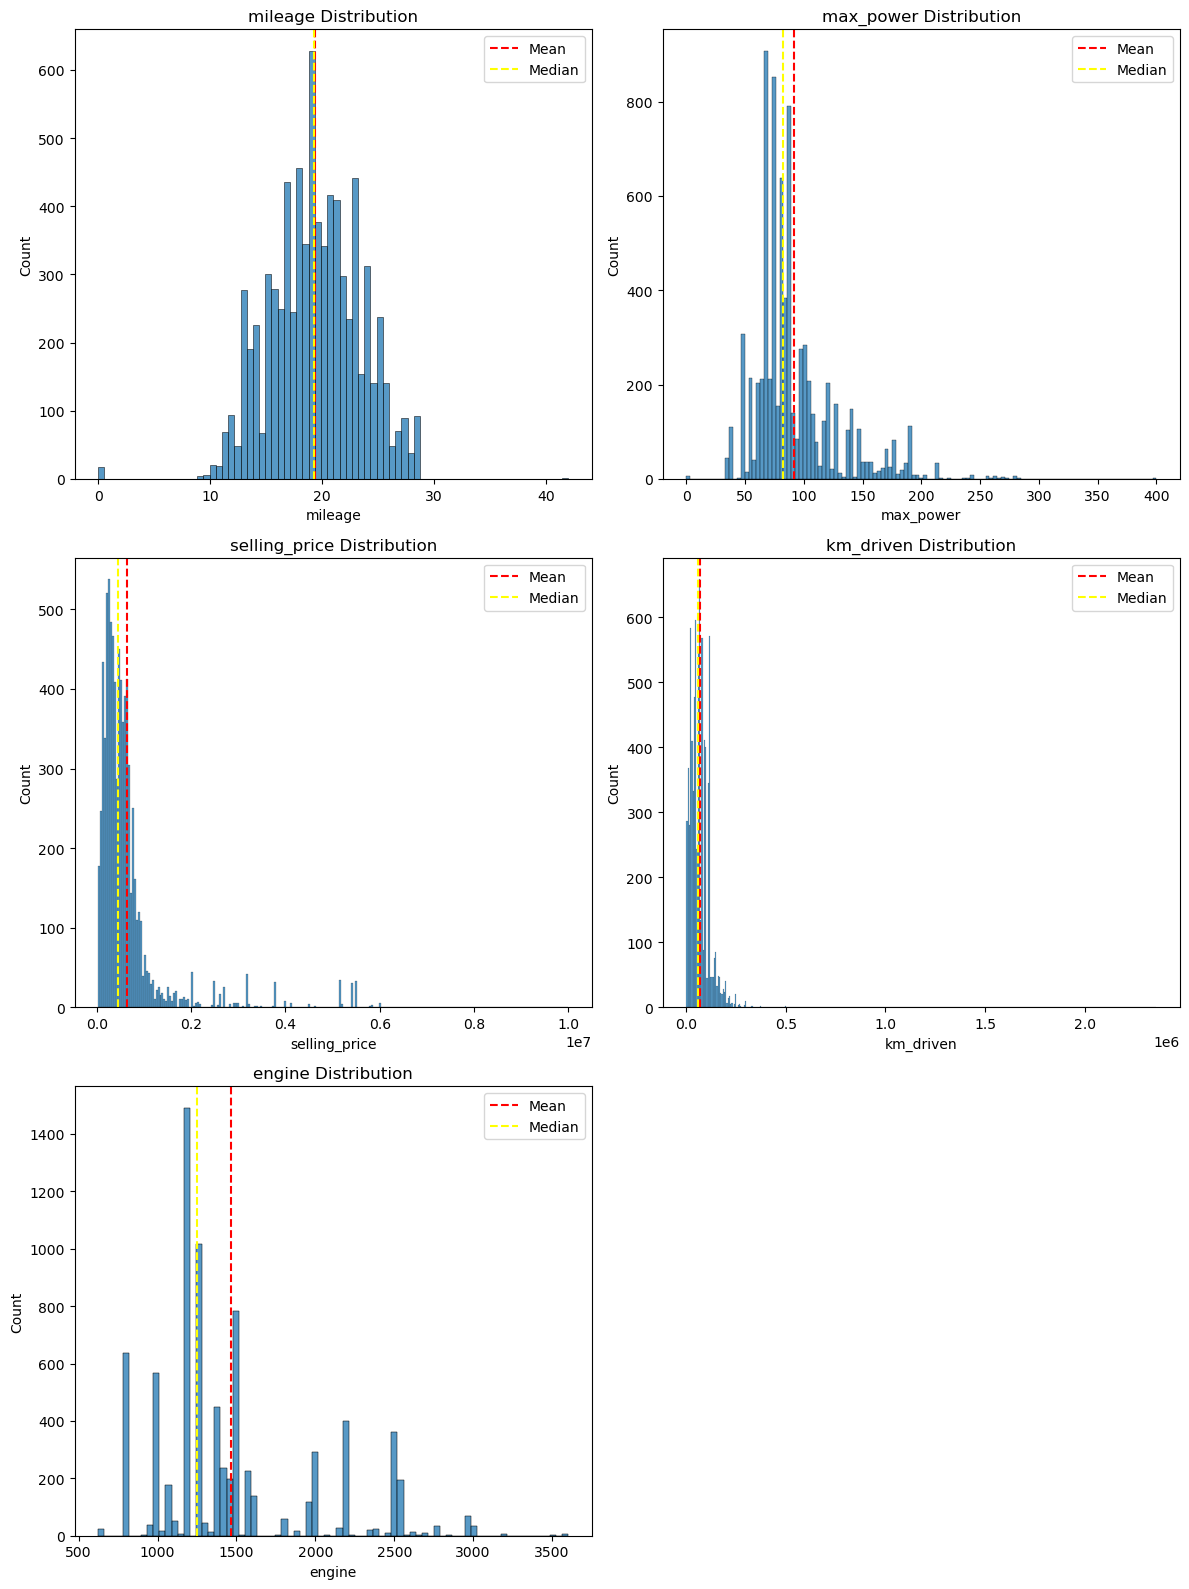

In [29]:
# List of columns with continuous data
mcon_col = ['mileage', 'max_power', 'selling_price', 'km_driven', 'engine']
displot_list(mcon_col,df)

* selling price and km_driven seem to have stange distribution

In [30]:
# see selling price and km driven in log

df["selling_price_log"] = np.log(df['selling_price'])
df["km_driven_log"] = np.log(df['km_driven'])
df[:5]

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats    brand  \
0   First Owner    23.40    1248      74.00    5.0   maruti   
1  Second Owner    21.14    1498     103.52    5.0    skoda   
2   Third Owner    17.70    1497      78.00    5.0    honda   
3   First Owner    23.00    1396      90.00    5.0  hyundai   
4   First Owner    16.10    1298      88.20    5.0   maruti   

   selling_price_log  km_driven_log  
0          13.017003      11.887931  
1          12.821258      11.695247  
2          11.970350      11.849398  
3          12.323856      11.751942  
4          11.775290      11.695247

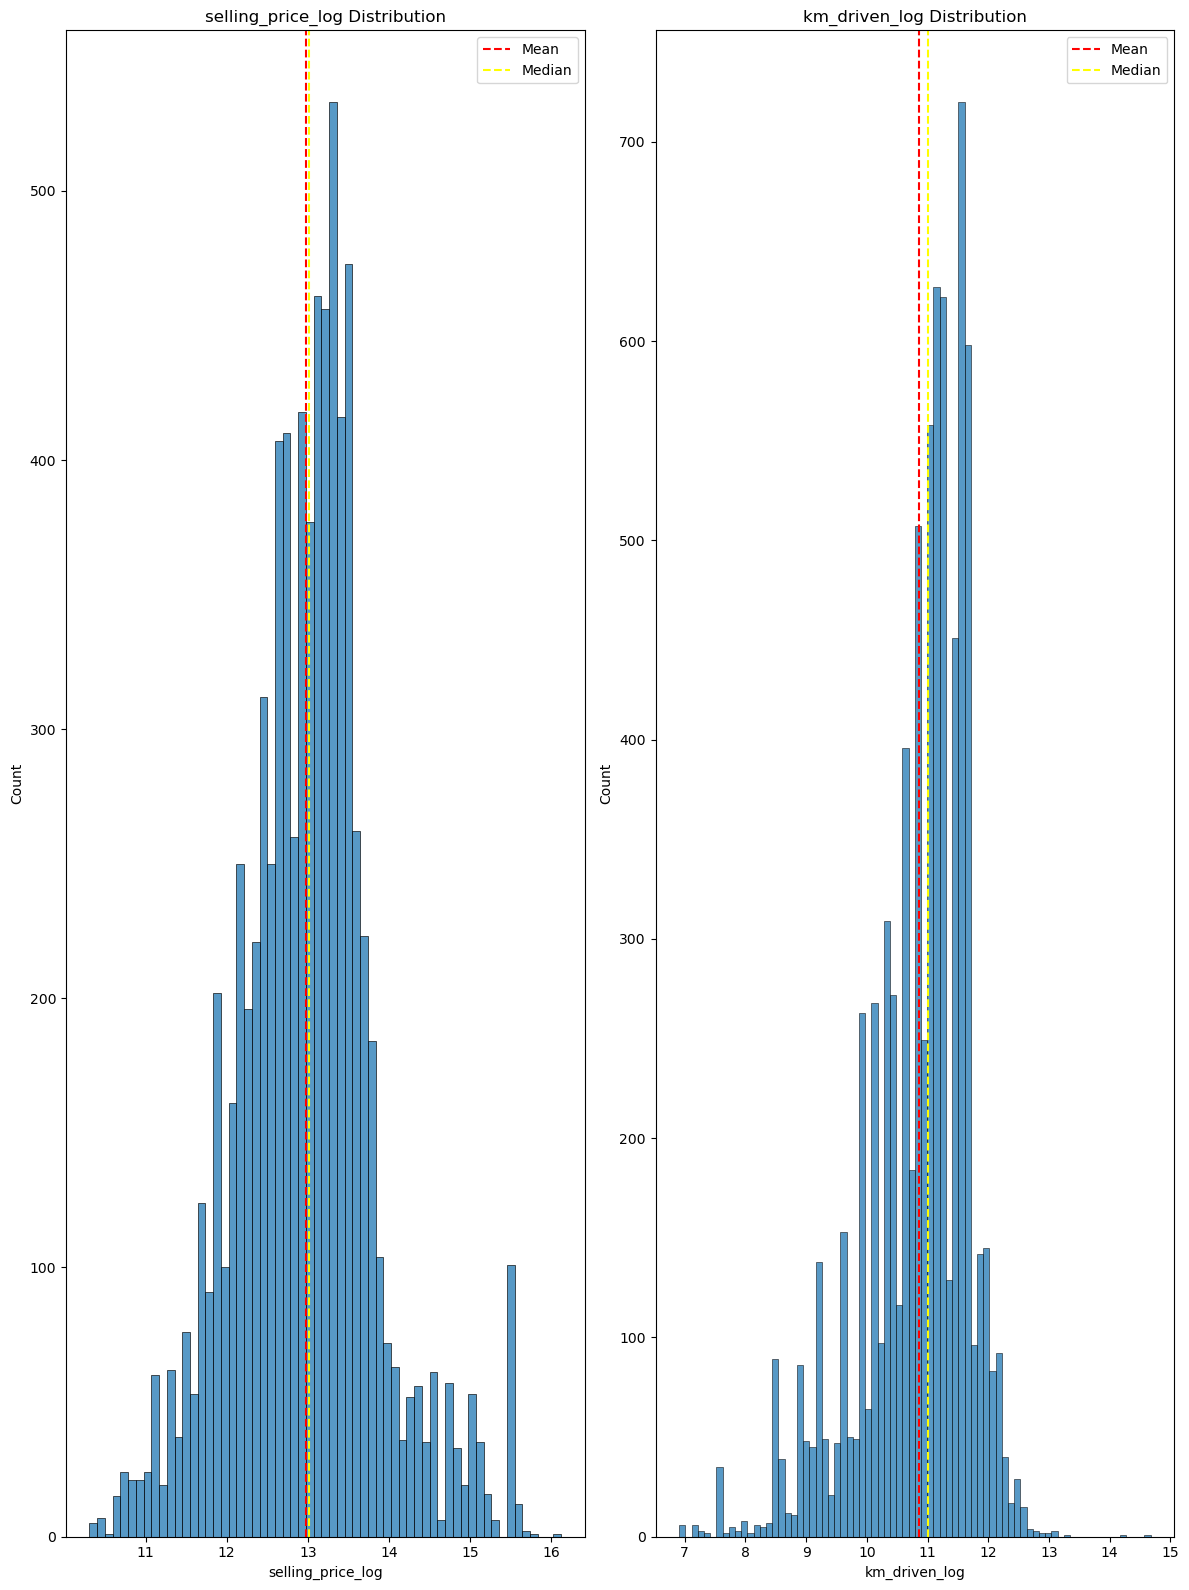

In [31]:
mcon_col = ['selling_price_log', 'km_driven_log']
displot_list(mcon_col,df)

* better!

### catagory data

In [32]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand', 'selling_price_log', 'km_driven_log'],
      dtype='object')

In [33]:
def count_plot_list(dis_col,df):
    # Calculate the number of rows needed for the subplots
    num_rows = (len(dis_col) + 1) // 2  # +1 to handle odd number of columns

    # Create a figure with the desired number of rows and 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 16))
    axes = axes.flatten()

    # Iterate through columns and create count plots
    for idx, col in enumerate(dis_col):
        ax = axes[idx]
        
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
        
        # Set plot title
        ax.set_title(f'{col} Count')
        
    # Remove any unused subplots
    for i in range(len(dis_col), num_rows * 2):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

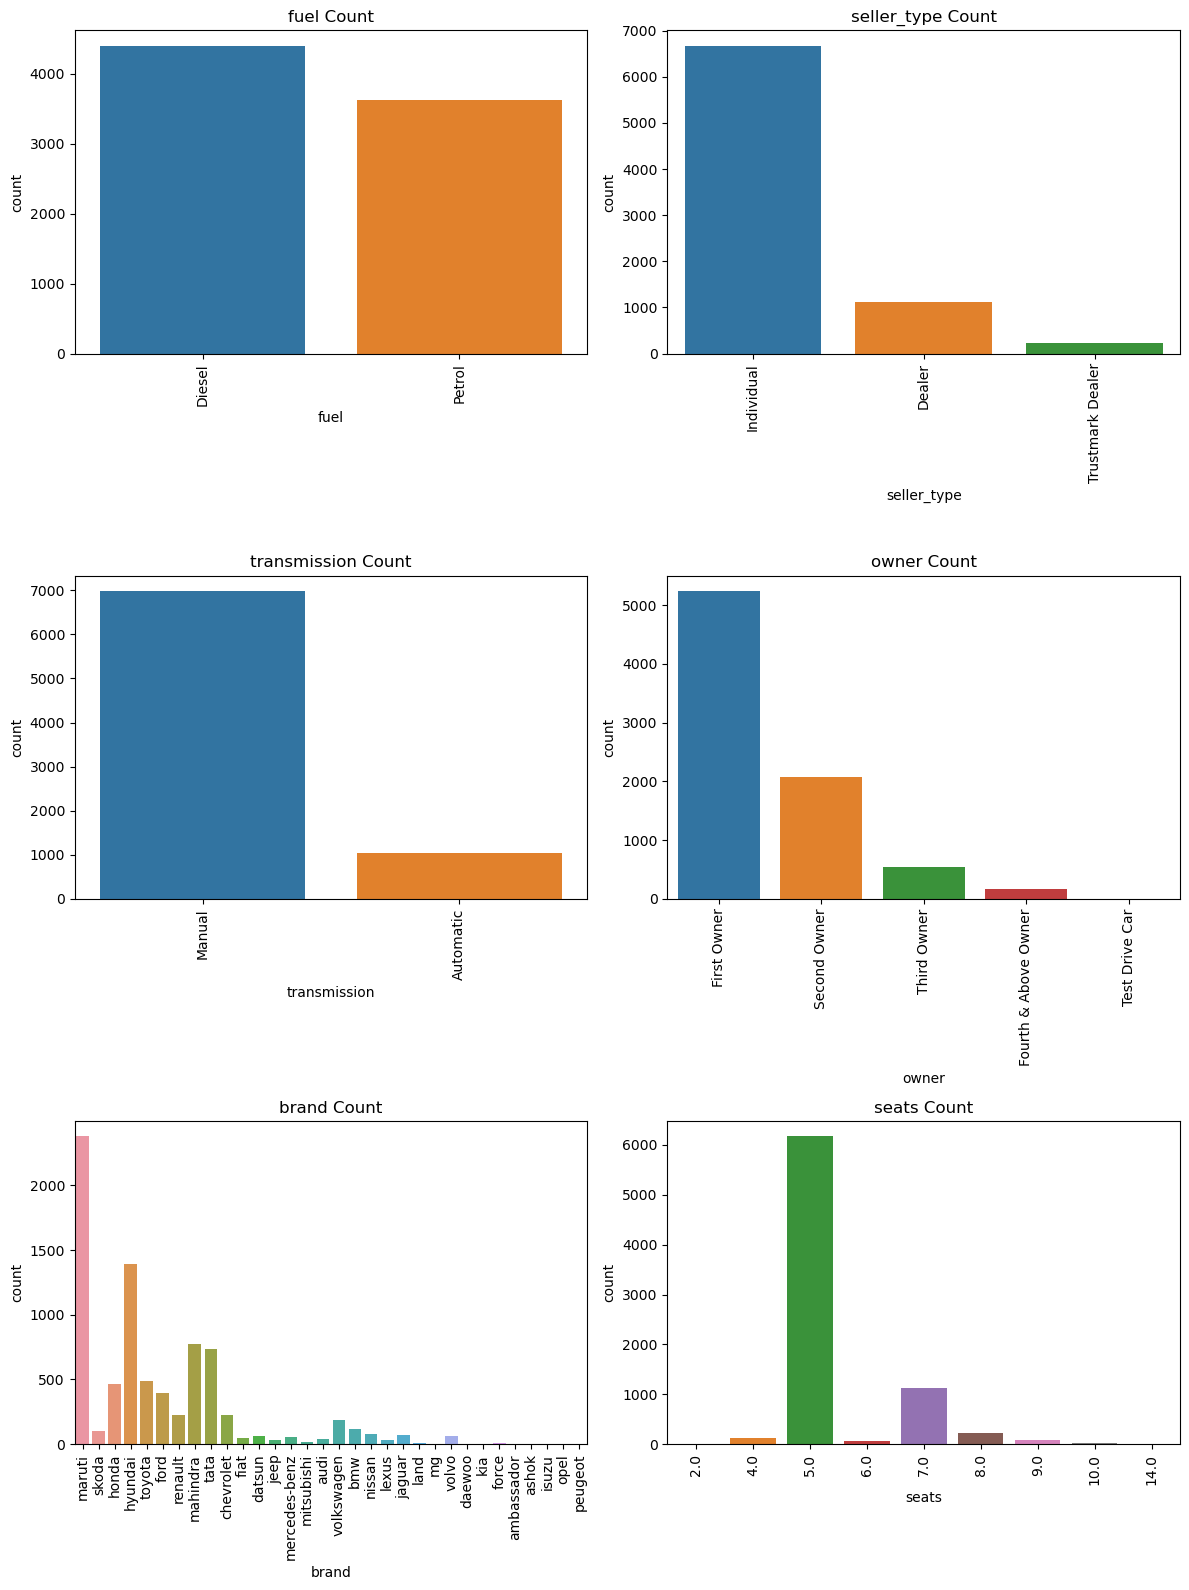

In [34]:
# count
# List of categorical columns
dis_col = ['fuel', 'seller_type', 'transmission', 'owner', 'brand','seats']

count_plot_list(dis_col,df)

* murati  is popular 
* most of the car are manual
* the test drive car is very little sample

In [35]:
def col_vs_avg_target(dis_col,target,df):
    # Calculate the number of rows needed for the subplots
    num_rows = (len(dis_col) + 1) // 2  # +1 to handle odd number of columns

    # Create a figure with the desired number of rows and 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 16))
    axes = axes.flatten()

    # Iterate through columns and create bar plots
    for idx, col in enumerate(dis_col):
        ax = axes[idx]
        
        df_plot = df.groupby([col])[target].mean().sort_values(ascending=False).reset_index()
        sns.barplot(data=df_plot, x=col, y=target, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
        
        # Set plot title
        ax.set_title(f'{col} vs Average {target}')
        
    # Remove any unused subplots
    for i in range(len(dis_col), num_rows * 2):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()


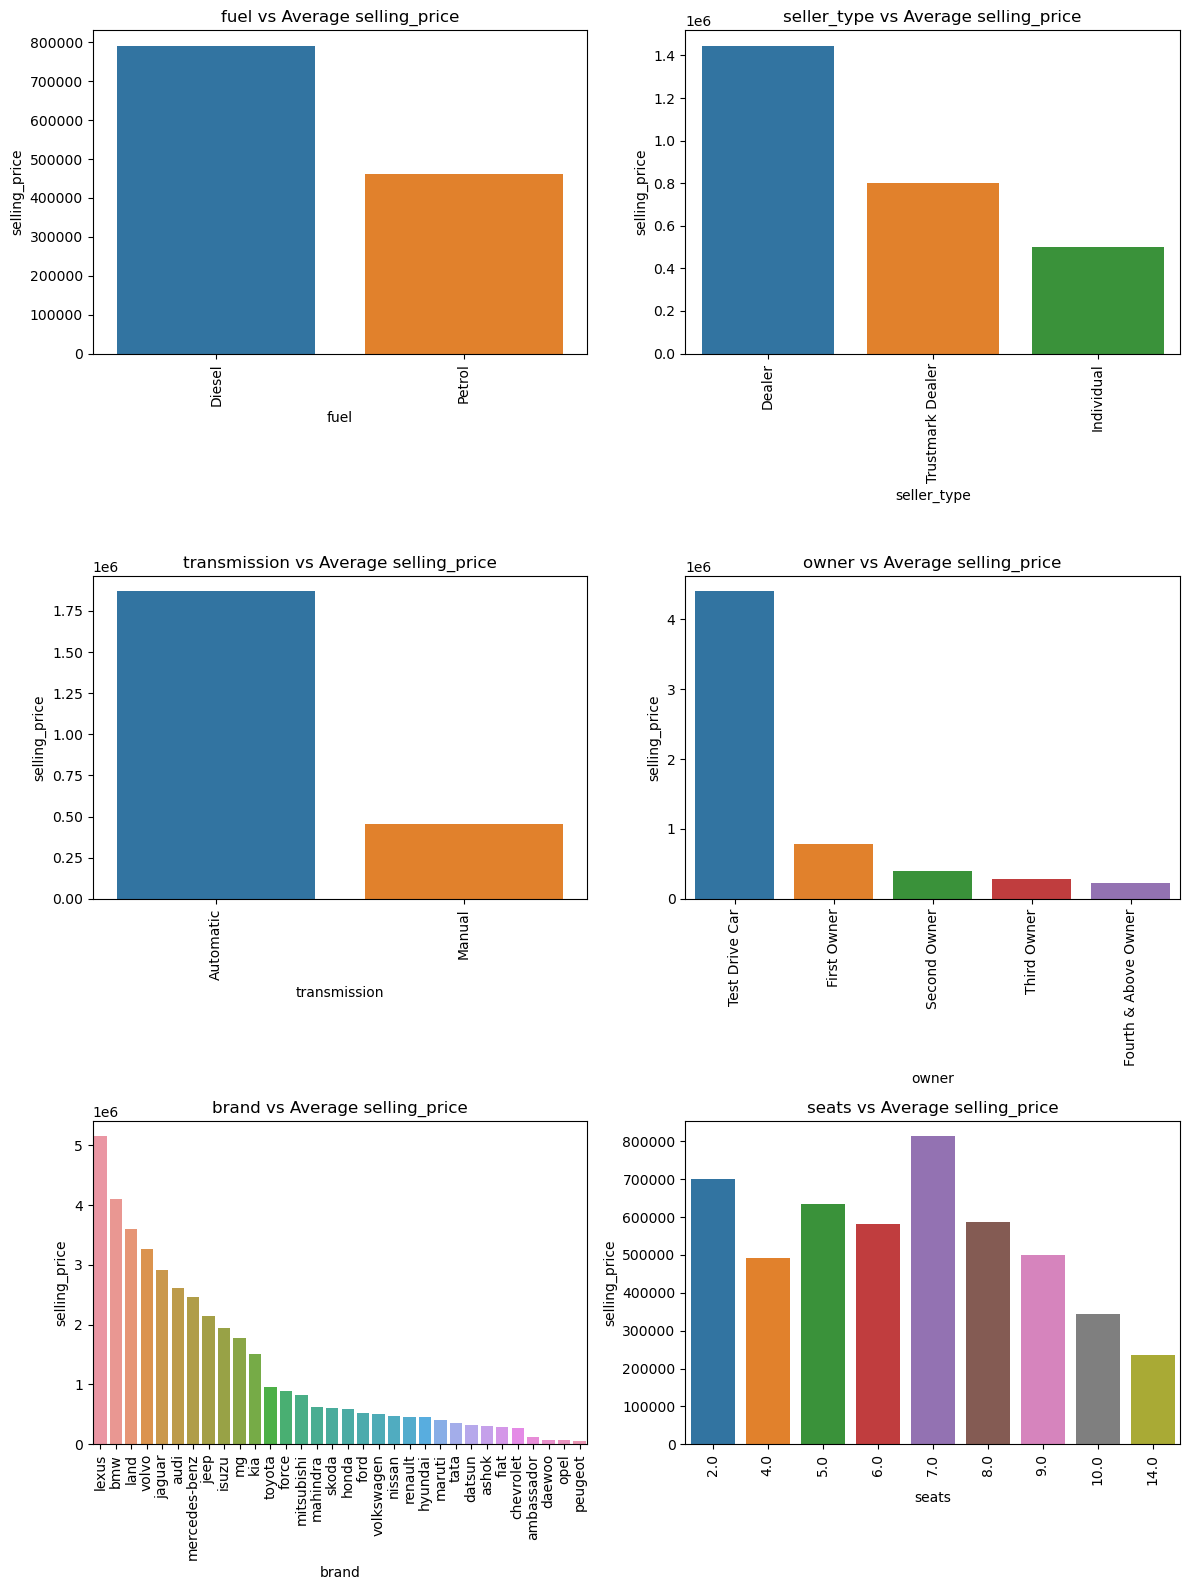

In [36]:
# compare average price
target = "selling_price"
dis_col = ['fuel', 'seller_type', 'transmission', 'owner', 'brand','seats']

col_vs_avg_target(dis_col,target,df)

* average prices of diesel car are seem to be higher than petrol
* automatic car is have higher price than manual
* Test Drive car price is very high compare to other

In [37]:
def box_plot_list(dis_col,target,df):
    # Calculate the number of rows needed for the subplots
    num_rows = (len(dis_col) + 1) // 2  # +1 to handle odd number of columns

    # Create a figure with the desired number of rows and 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 20))
    axes = axes.flatten()

    # Iterate through columns and create box plots
    for idx, col in enumerate(dis_col):
        ax = axes[idx]
        sns.boxplot(data=df.sort_values('selling_price',ascending=False), x=col, y=target, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
        
        # Set plot title
        ax.set_title(f'{col} vs {target} (Box Plot)')
        
    # Remove any unused subplots
    for i in range(len(dis_col), num_rows * 2):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()


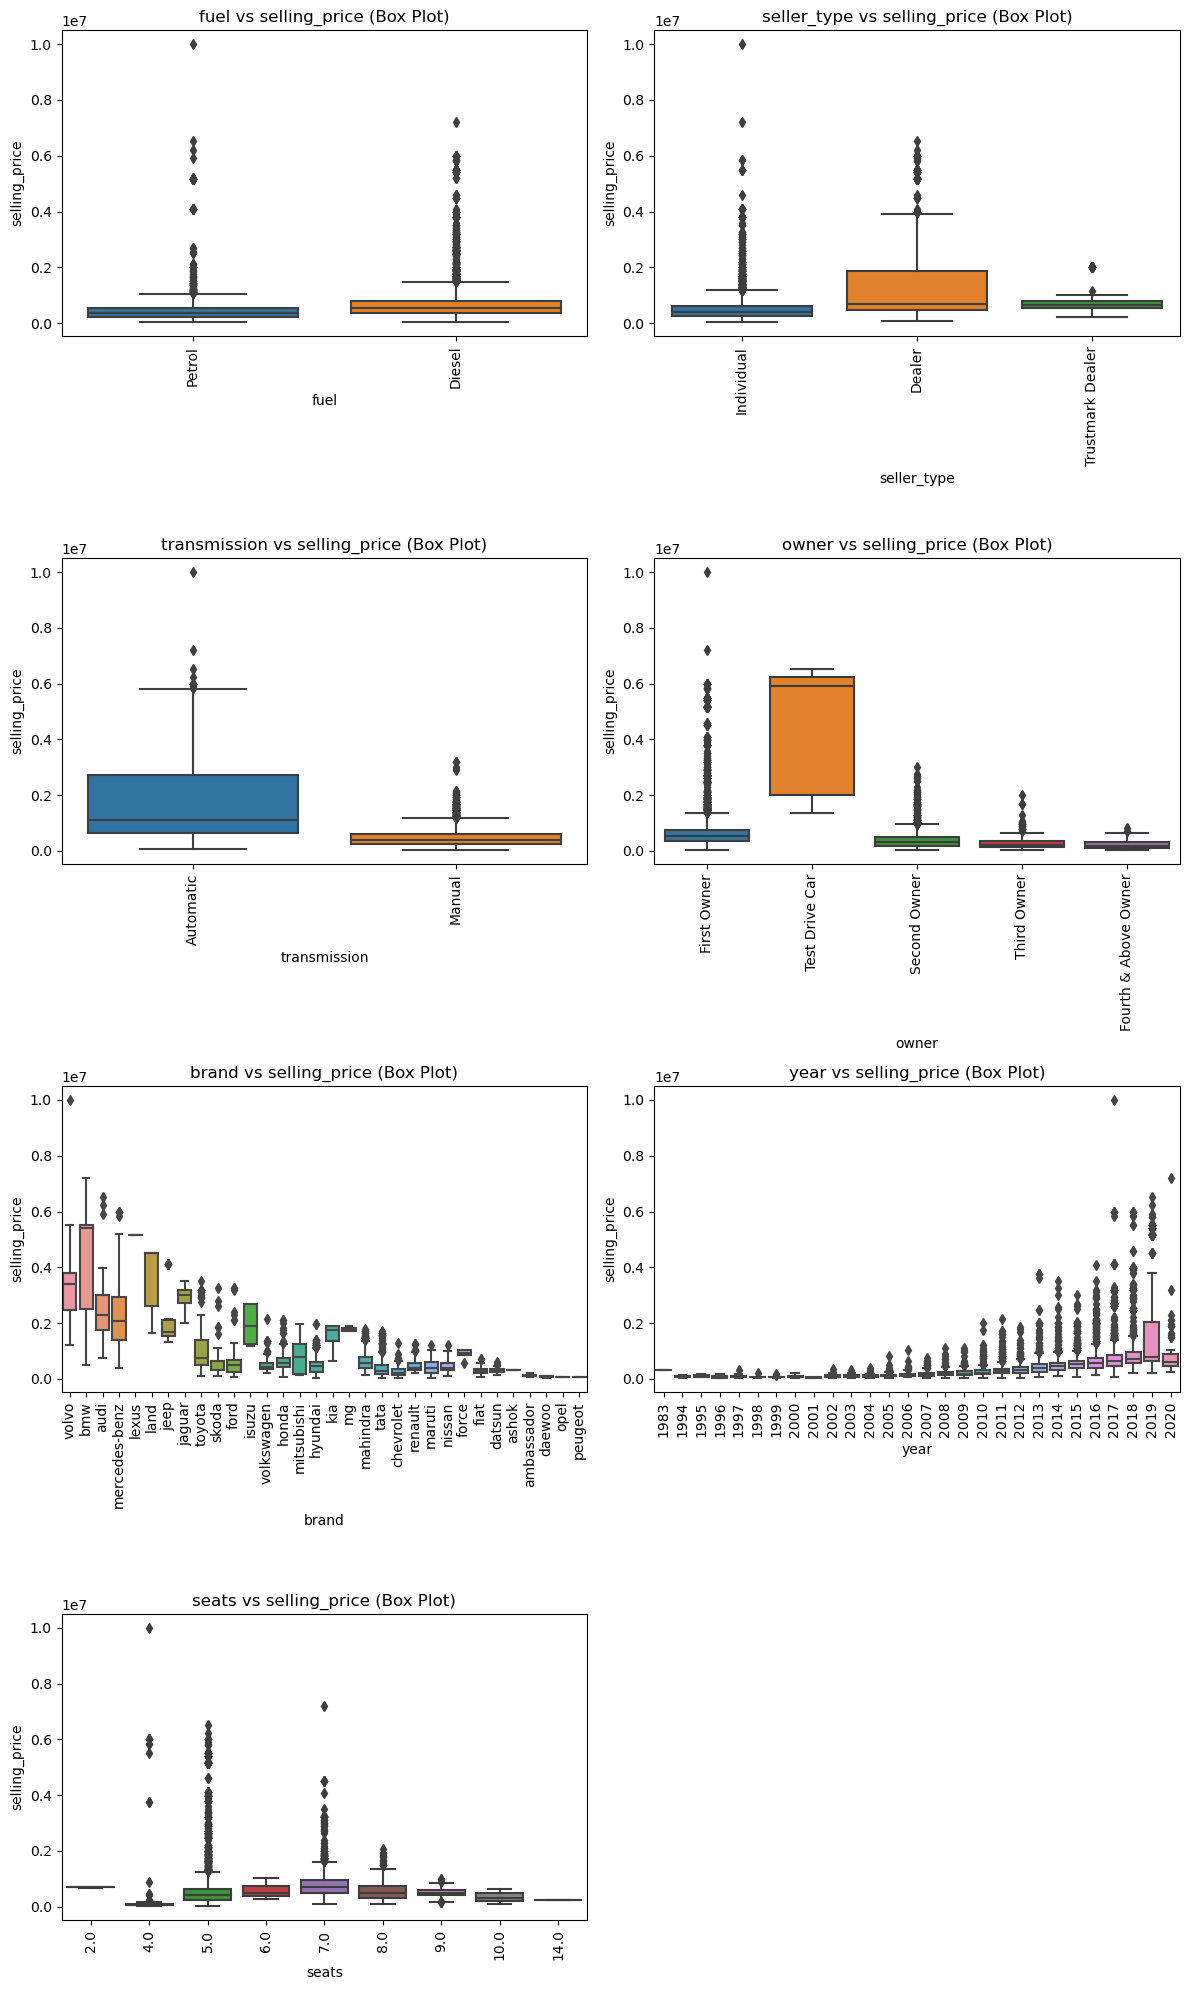

In [38]:
target = "selling_price"
dis_col = ['fuel', 'seller_type', 'transmission', 'owner', 'brand','year','seats']

box_plot_list(dis_col,target,df)


* fuel boxplot look very similar 
* actually it's very few datapoints for test drive car categories to make an inference if we see from count plot.

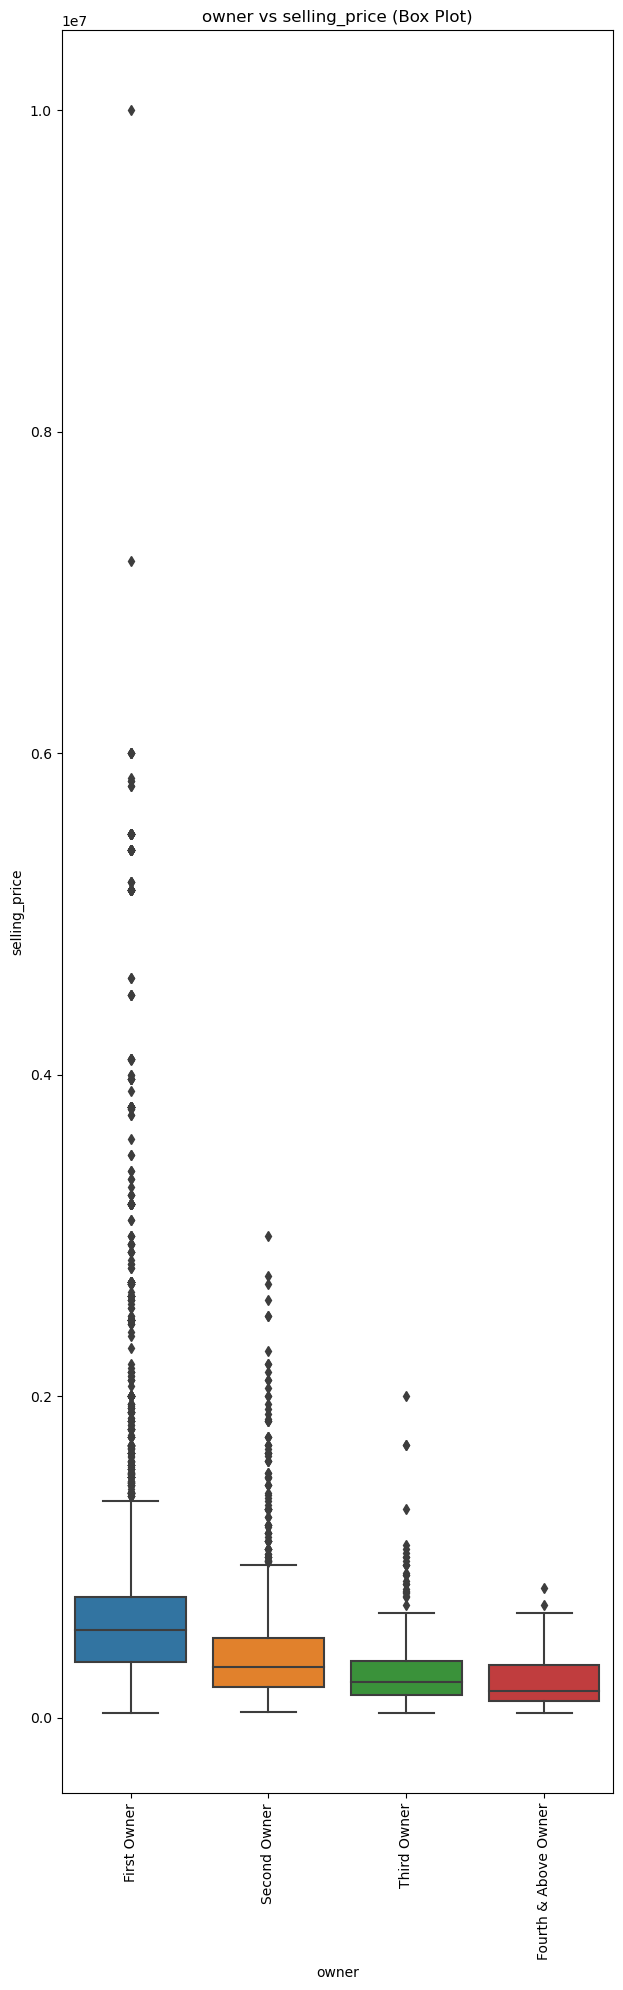

In [39]:
# try see it with no test drive
target = "selling_price"
dis_col = ['owner']
df_no_test_drive = df[df['owner'] != 'Test Drive Car']
box_plot_list(dis_col,target,df = df_no_test_drive)

* seem like third owner and fourth is not much 

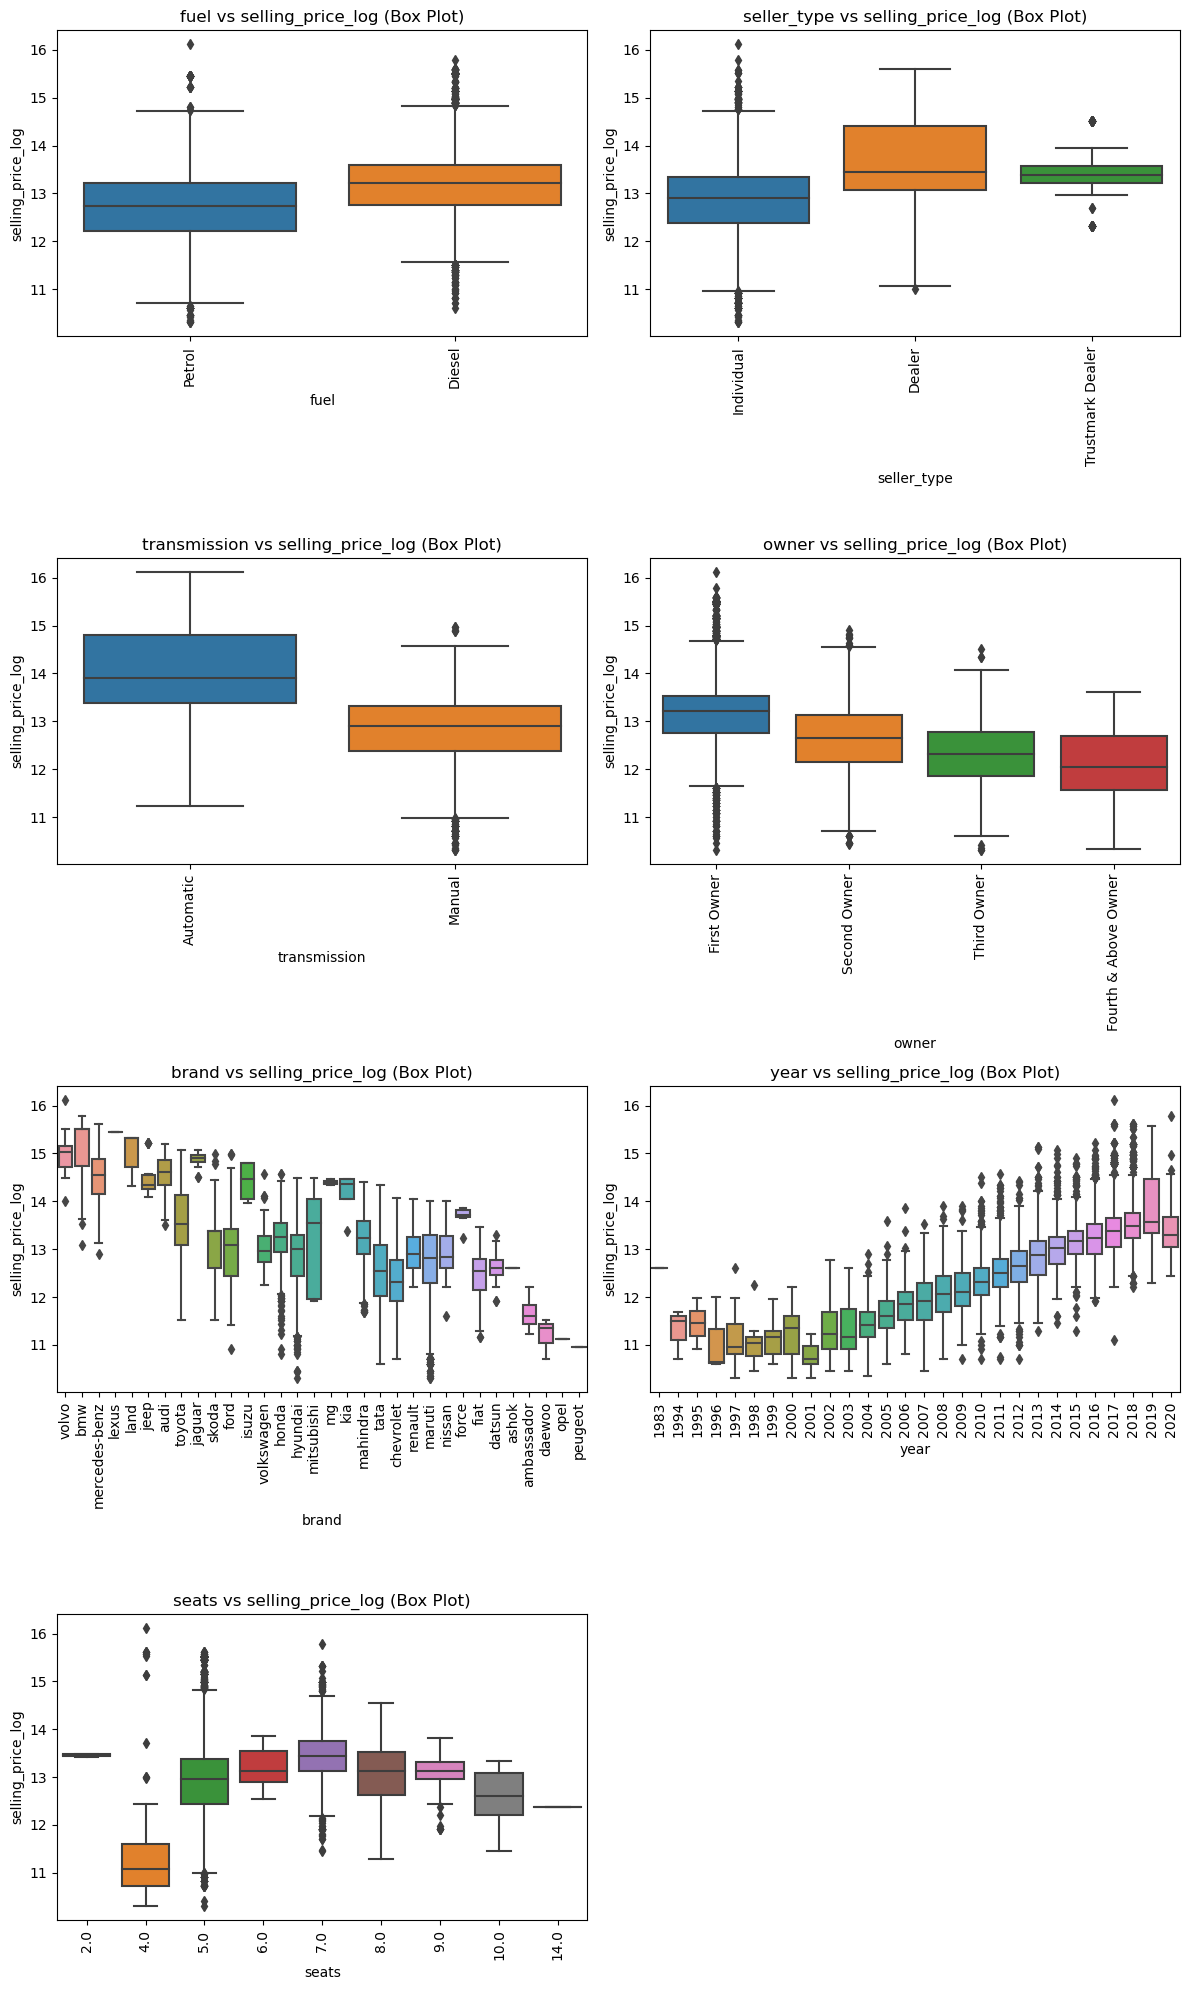

In [40]:
target = "selling_price_log"
dis_col = ['fuel', 'seller_type', 'transmission', 'owner', 'brand','year','seats']

box_plot_list(dis_col,target,df_no_test_drive)



* trust mark dealer and dealer is almost the same
* i still don't know how to handling outliner, but someone said i may drop them. let see outlier percent after we encode it.

### numurical 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               8033 non-null   int64  
 1   selling_price      8033 non-null   int64  
 2   km_driven          8033 non-null   int64  
 3   fuel               8033 non-null   object 
 4   seller_type        8033 non-null   object 
 5   transmission       8033 non-null   object 
 6   owner              8033 non-null   object 
 7   mileage            7819 non-null   float64
 8   engine             7819 non-null   Int64  
 9   max_power          7825 non-null   float64
 10  seats              7819 non-null   float64
 11  brand              8033 non-null   object 
 12  selling_price_log  8033 non-null   float64
 13  km_driven_log      8033 non-null   float64
dtypes: Int64(1), float64(5), int64(3), object(5)
memory usage: 949.2+ KB


In [42]:
def scaterplot_list(con_col,target,hue,df):
    num_rows = (len(con_col) + 1) // 2  # +1 to handle odd number of columns

    # Create a figure with the desired number of rows and 2 columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 16))
    axes = axes.flatten()

    # Iterate through columns and create scatter plots with hue
    for idx, col in enumerate(con_col):
        ax = axes[idx]
        sns.scatterplot(data=df, x=col, y=target,hue= hue,ax=ax) # hue= 'transmission',
        
        # Set plot title
        ax.set_title(f'{col} vs {target} (Scatter Plot)')
        
    # Remove any unused subplots
    for i in range(len(con_col), num_rows * 2):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

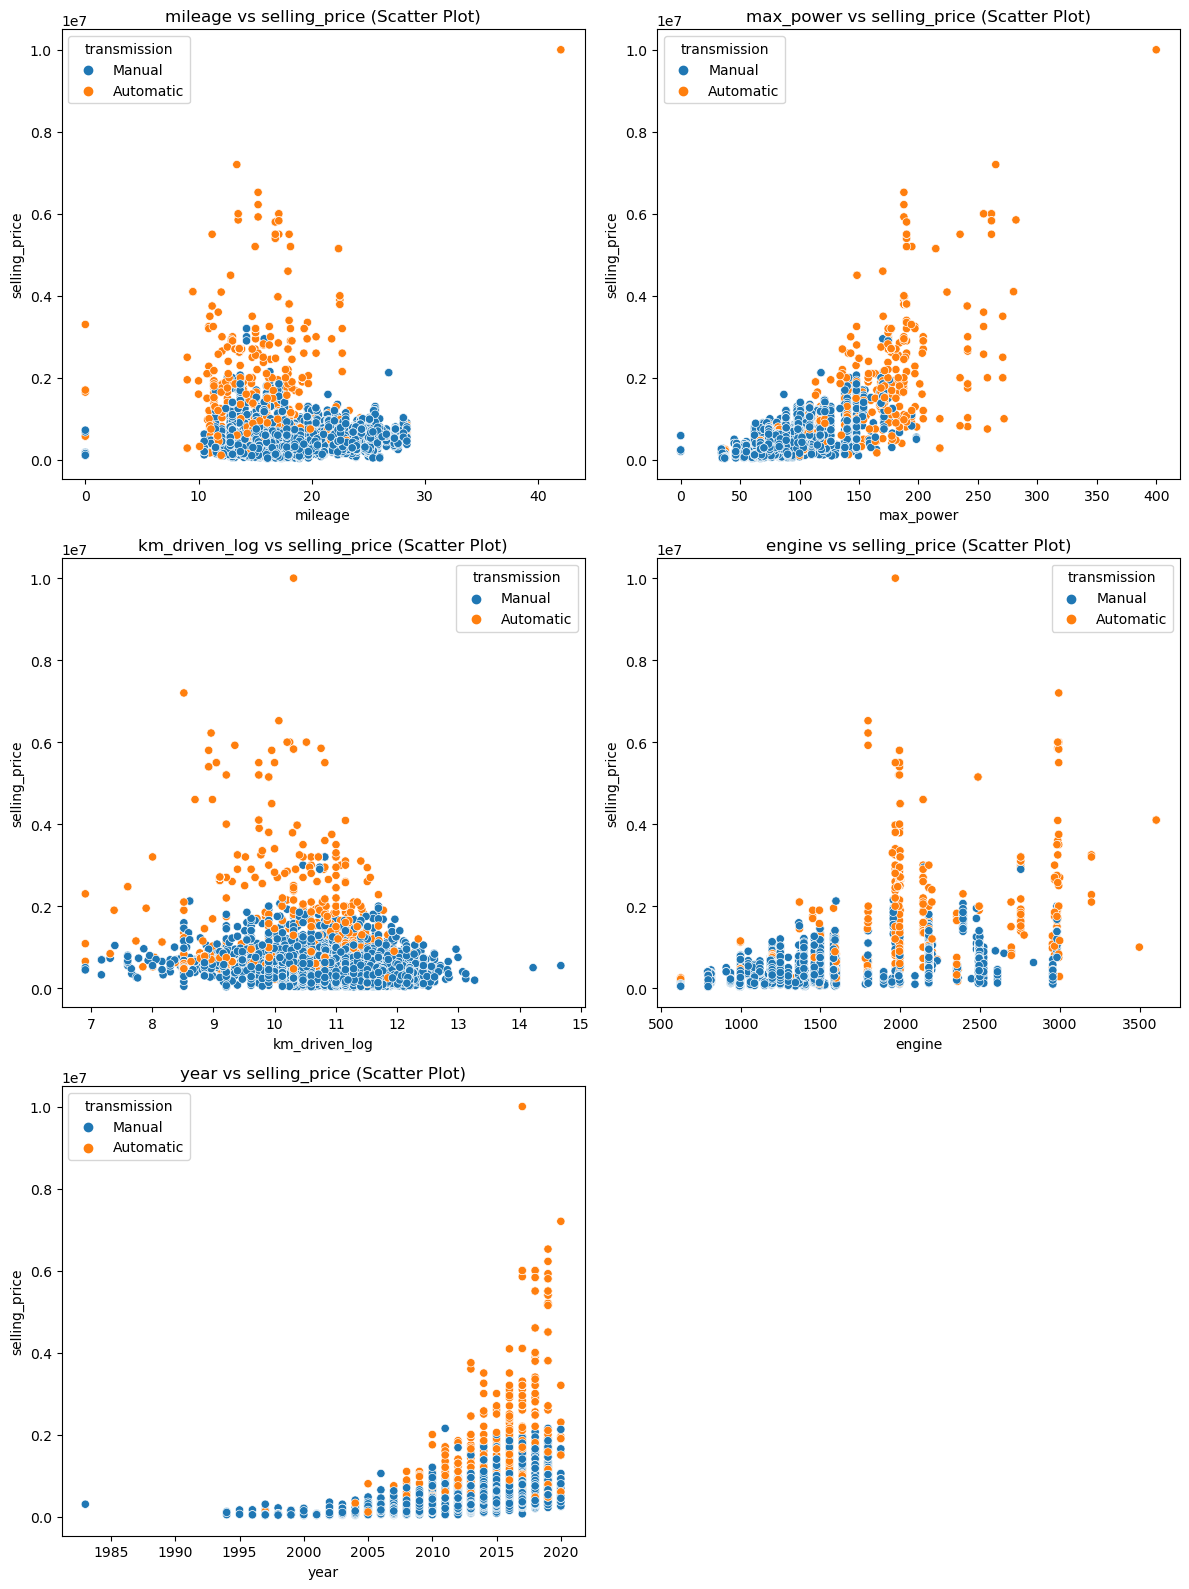

In [43]:
target = "selling_price"
hue = "transmission"
con_col = ['mileage', 'max_power', 'km_driven_log', 'engine', 'year']

scaterplot_list(con_col,target,hue,df)

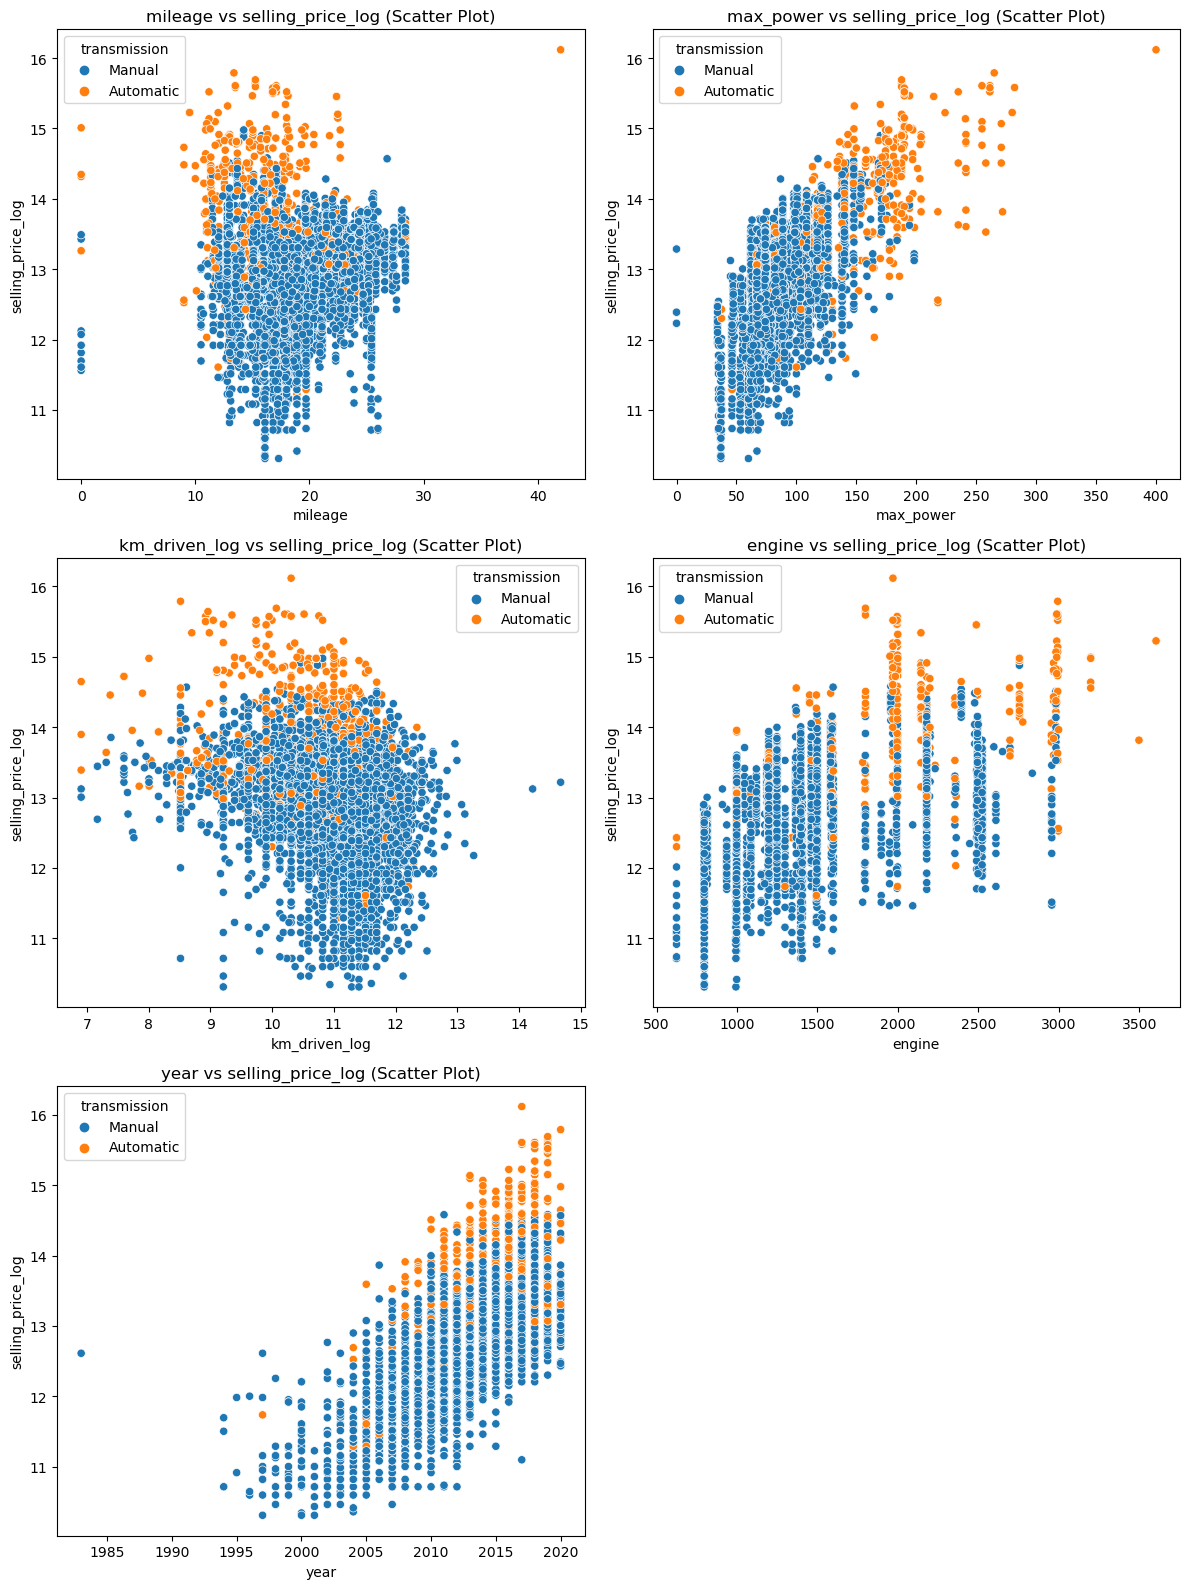

In [44]:
target = "selling_price_log"
hue = "transmission"
con_col = ['mileage', 'max_power', 'km_driven_log', 'engine', 'year']

scaterplot_list(con_col,target,hue,df)

* look like mileage and km driven not clearly have relation with price much

### relation all

c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


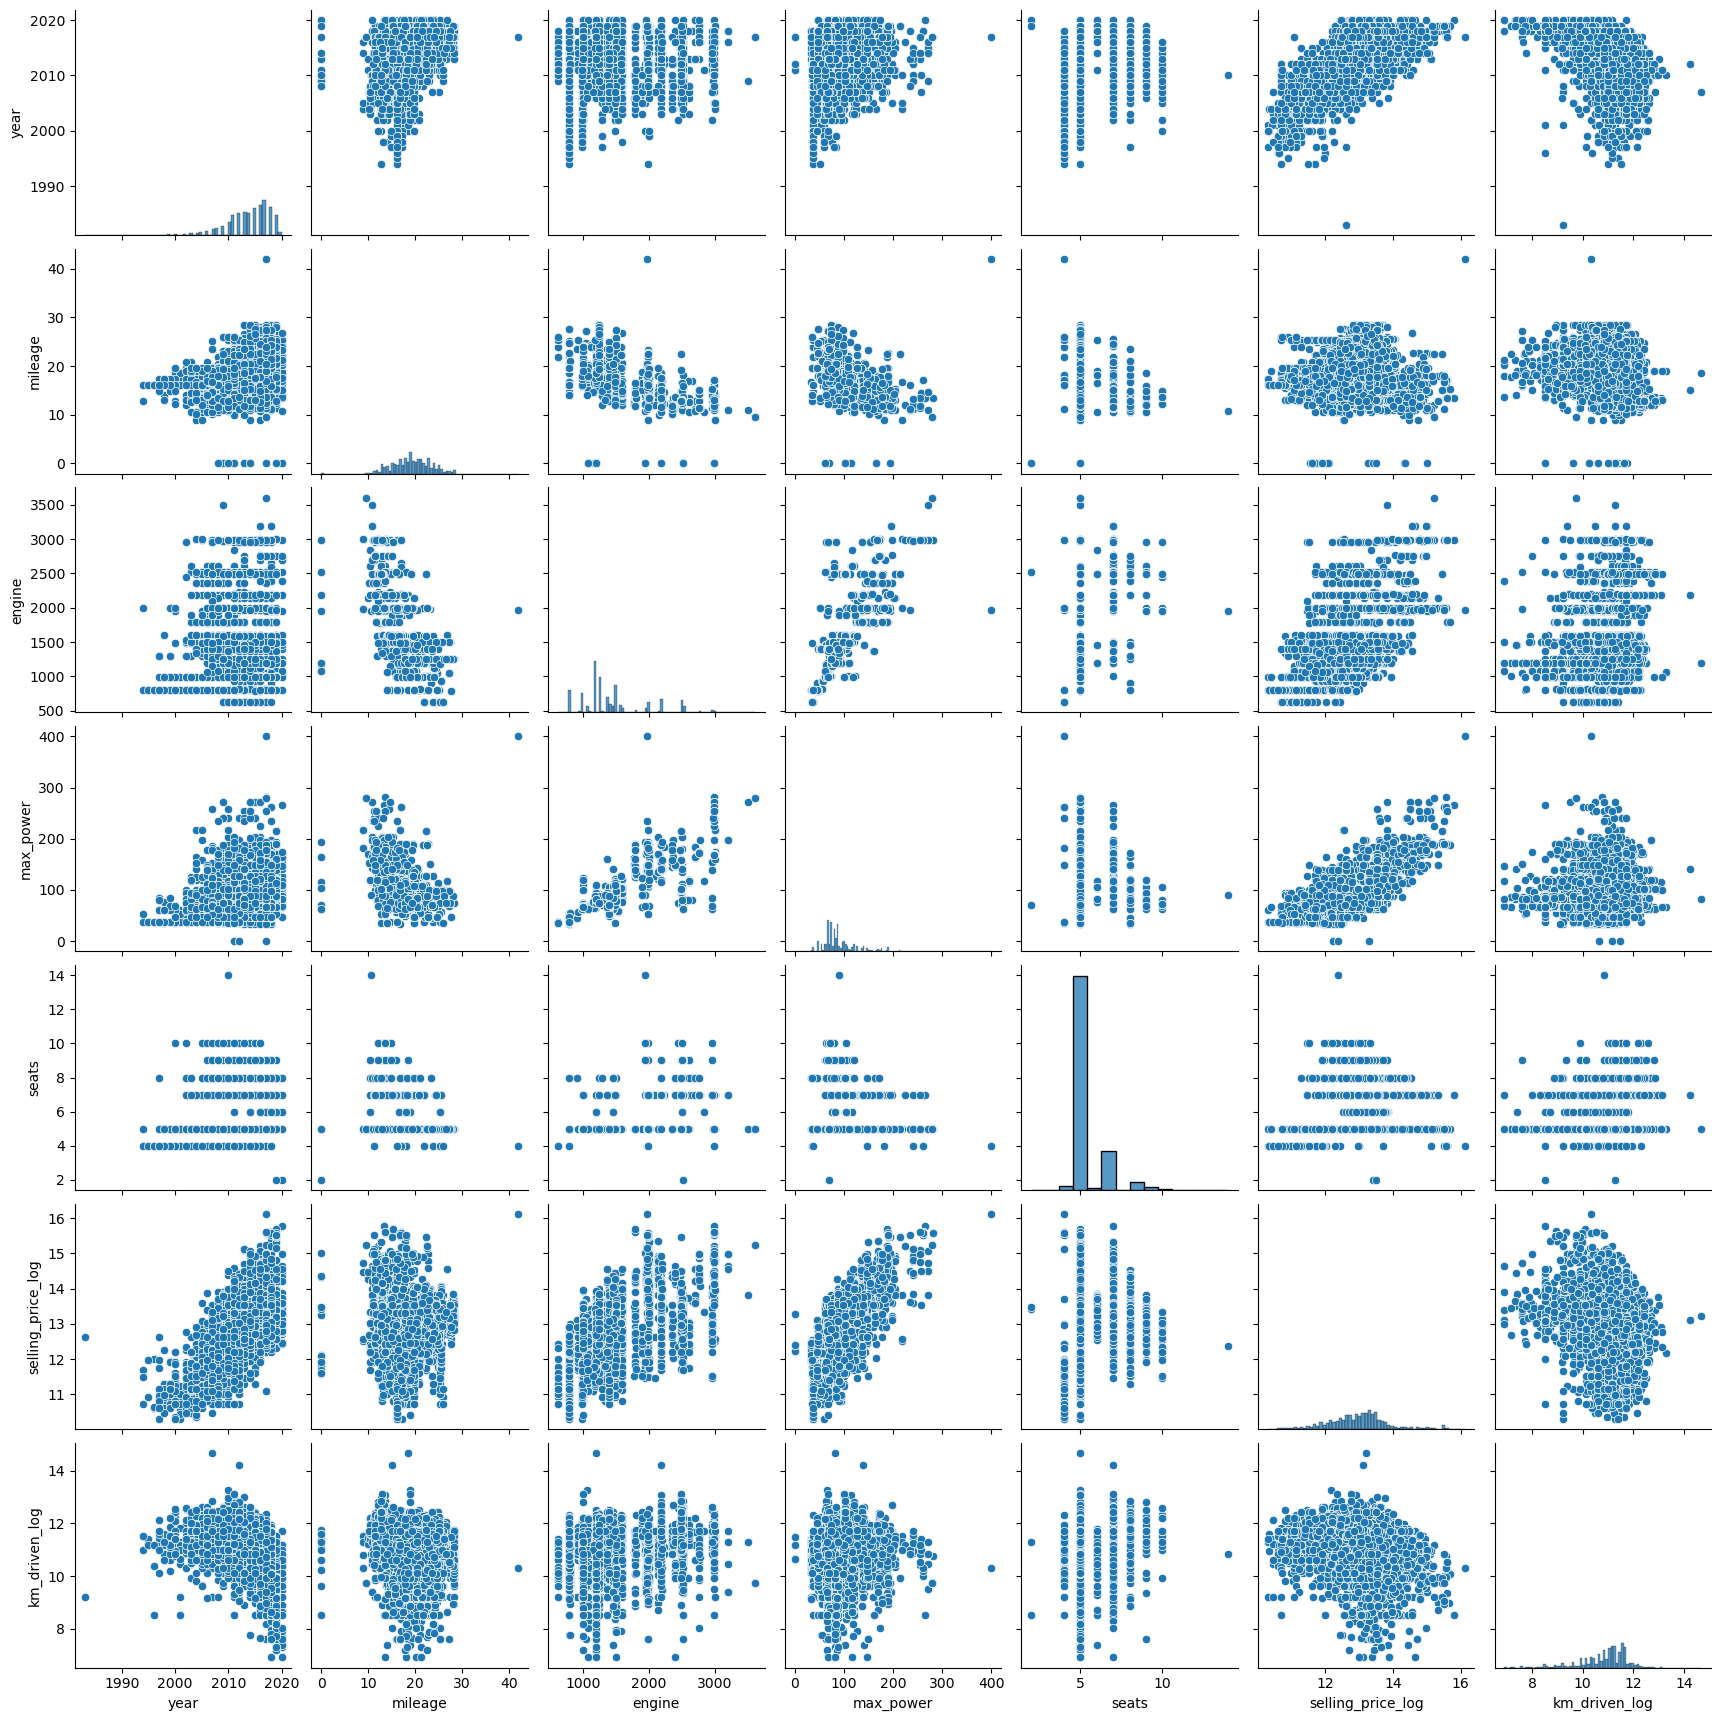

In [45]:
sns.pairplot(df.drop(columns=['selling_price','km_driven']))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36988\96763724.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<AxesSubplot:>

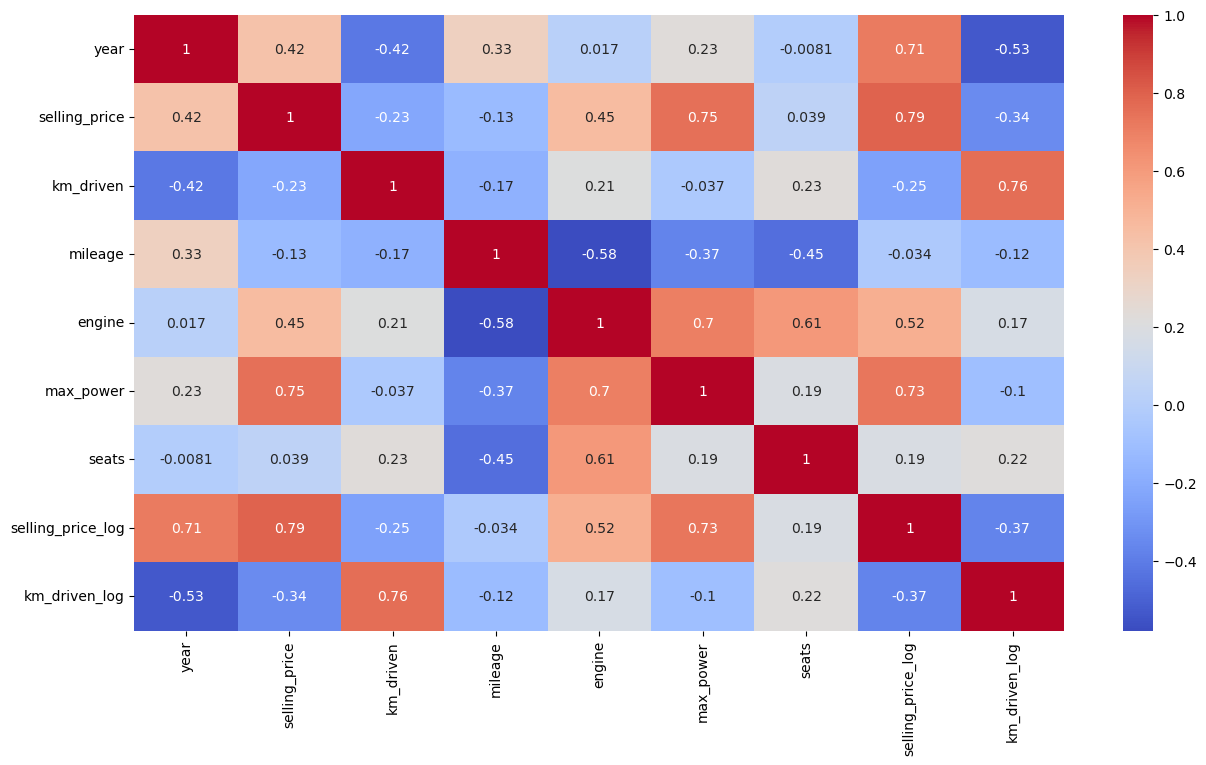

In [46]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

* some correlation change so much when do log tranfrom on selling price
* correation of km driven log also increse from km driven

### feature engineering? 

In [47]:
# let drop test drive car for real
df = df[df['owner'] != 'Test Drive Car']

In [48]:
# just for fun
# create country for each brand
def brand2country(car,country_mapping):
    for country,brand in country_mapping.items():
        if car in brand:
            return country

    return car

country_mapping = {
    "India": ["maruti", "mahindra", "tata", "ambassador", 'force', "ashok"],
    "South Korea": ["hyundai", "kia", "daewoo"],
    "Japan": ["toyota", "honda", "nissan", "datsun", "lexus", "mitsubishi", "isuzu"],
    "United States": ["ford", "chevrolet", "jeep"],
    "France": ["renault", "peugeot"],
    "Germany": ["volkswagen", "bmw", "mercedes-benz", "audi", "opel"],
    "Czech Republic": ["skoda"],
    "United Kingdom": ["jaguar", "land", "mg"],
    "Sweden": ["volvo"],
    "Italy": ["fiat"],
}
# group car brand
df['country'] = df['brand'].apply(lambda x: brand2country(x,country_mapping ))
df['country'].value_counts()

India             3894
South Korea       1400
Japan             1153
United States      656
Germany            397
France             229
Czech Republic     105
United Kingdom      80
Sweden              67
Italy               47
Name: country, dtype: int64

In [49]:
# try to do binning for fun

temp = df.copy()
table = temp.groupby(['brand'])["selling_price"].mean()
temp = temp.merge(table.reset_index(), how='left',on='brand')
bins = [0,1000000,3500000,10000000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['selling_price_y'],bins,right=False,labels=cars_bin)

In [50]:
df[:5]

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats    brand  \
0   First Owner    23.40    1248      74.00    5.0   maruti   
1  Second Owner    21.14    1498     103.52    5.0    skoda   
2   Third Owner    17.70    1497      78.00    5.0    honda   
3   First Owner    23.00    1396      90.00    5.0  hyundai   
4   First Owner    16.10    1298      88.20    5.0   maruti   

   selling_price_log  km_driven_log         country carsrange  
0          13.017003      11.887931           India    Budget  
1          12.821258      11.695247  Czech Republic    Budget  
2          11.970350      11.849398           Japan    Budget  
3          12.323856      11.751942     South Korea    Budget  
4          11.775290      11.695247           India    Budget

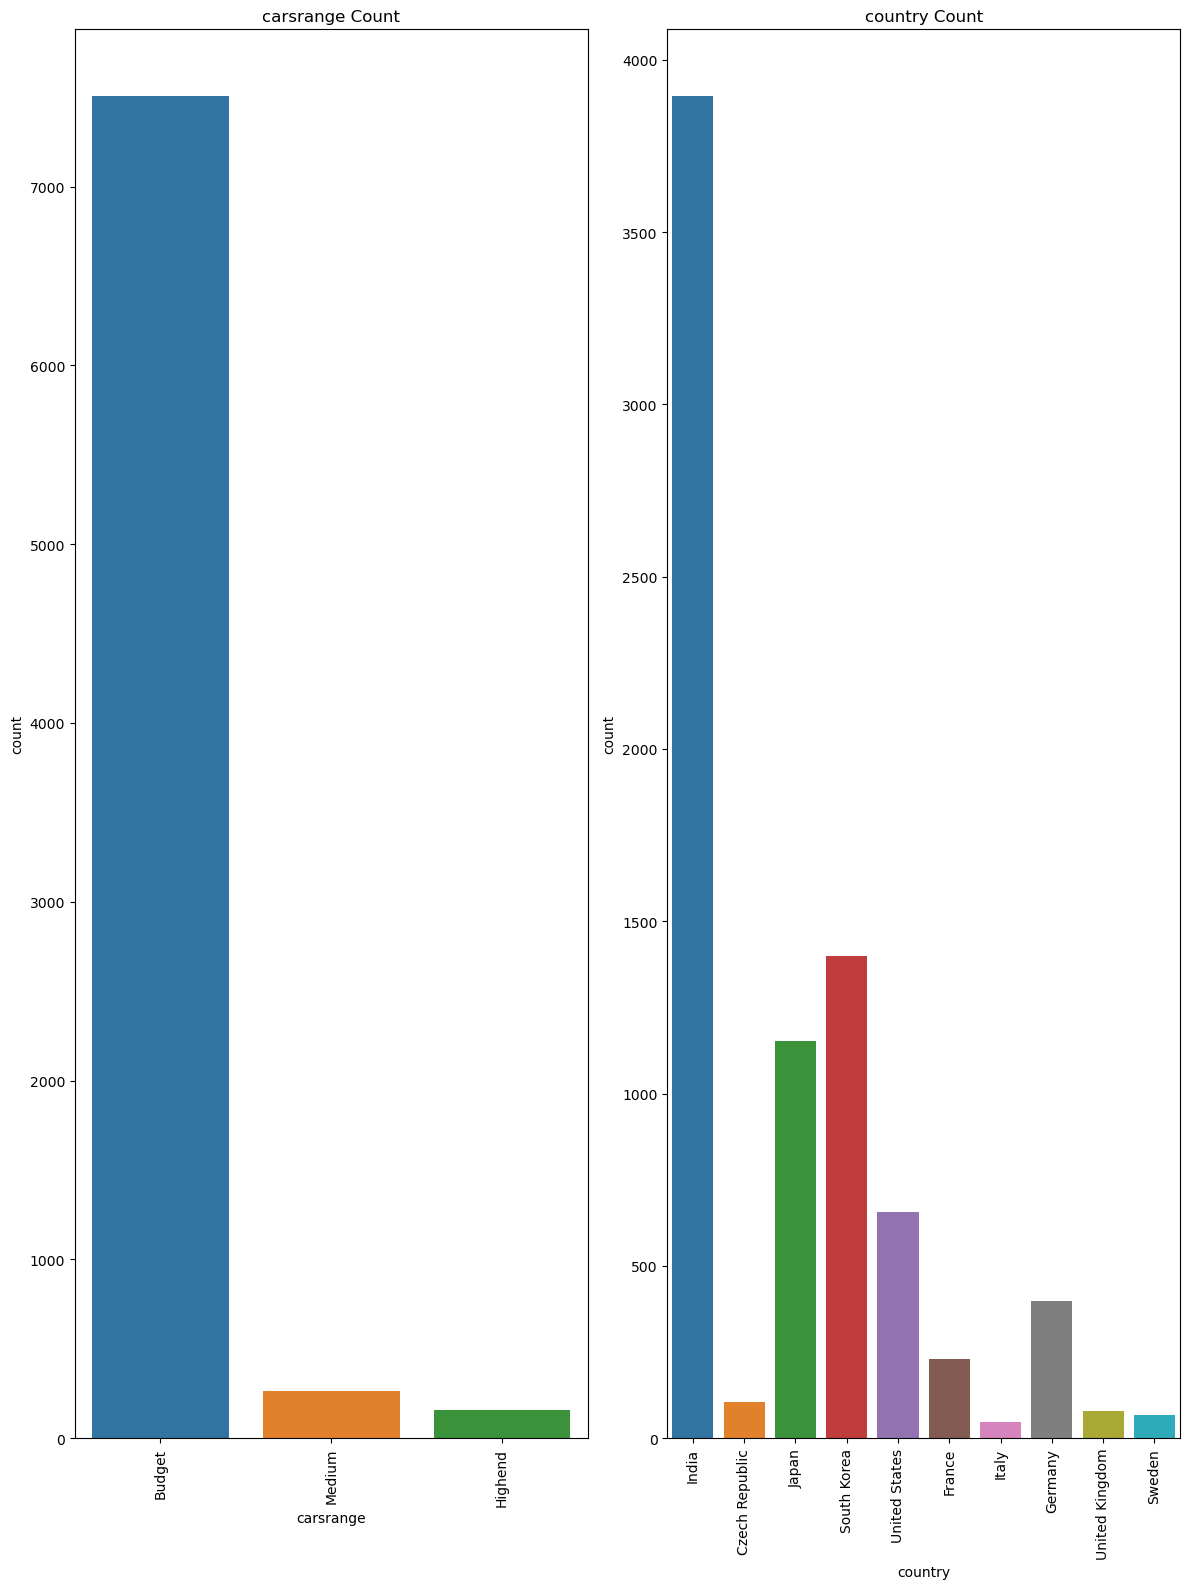

In [51]:
# count
# List of categorical columns
dis_col = ['carsrange','country']

count_plot_list(dis_col,df)

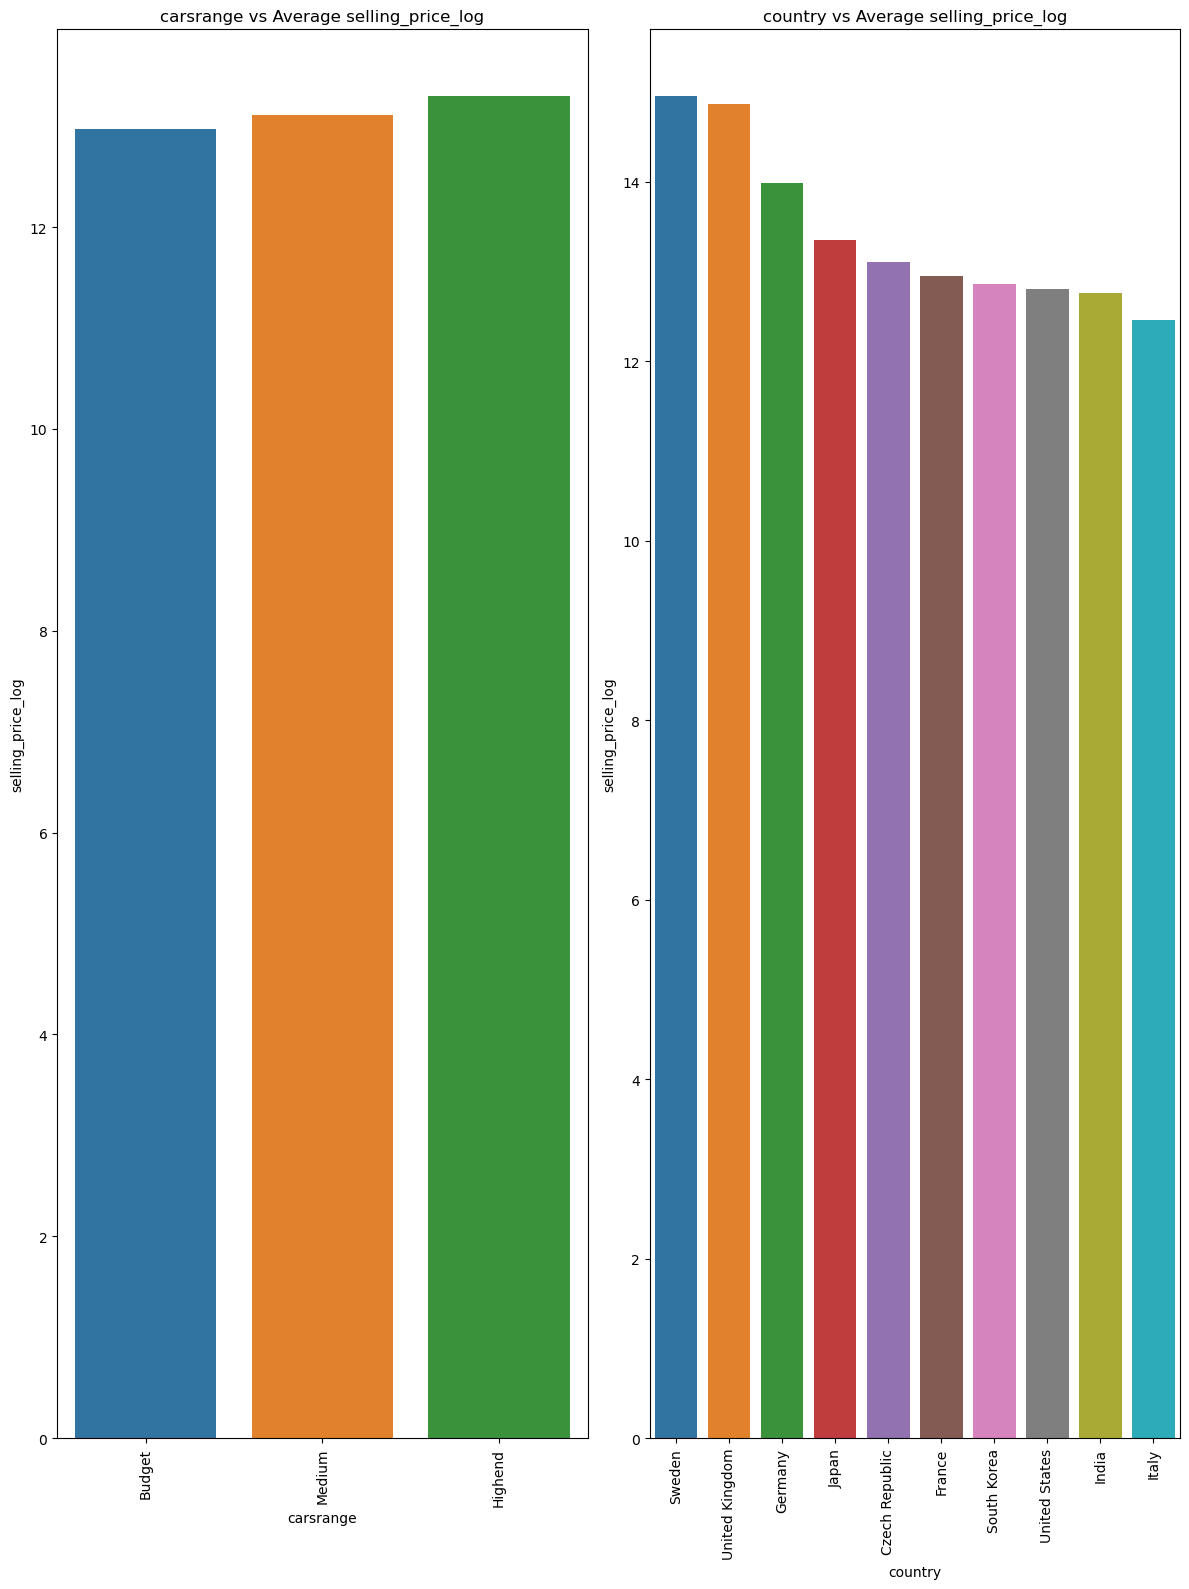

In [52]:
col_vs_avg_target(dis_col,target,df)

* actually, it almost no different after binning

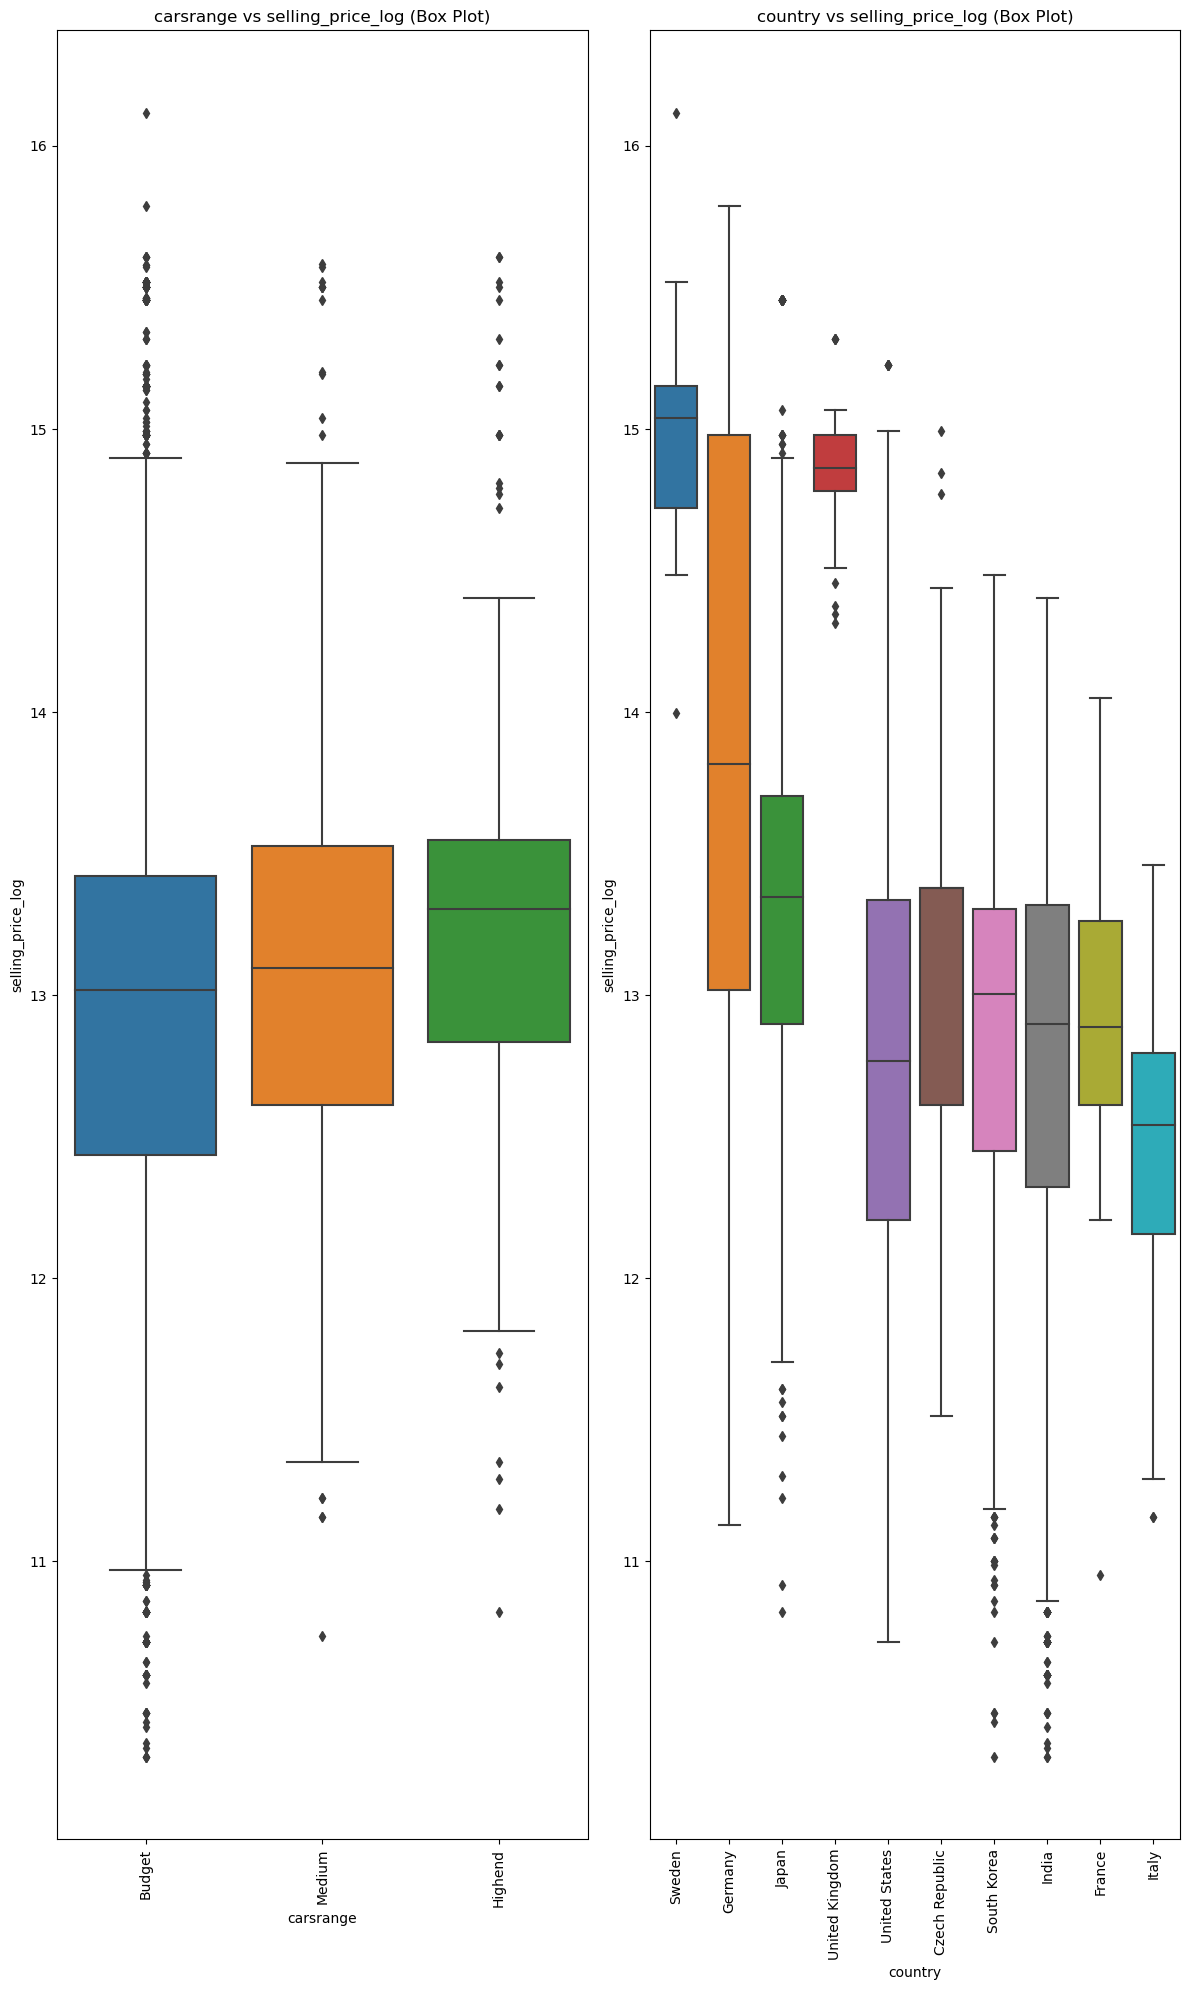

In [53]:
box_plot_list(dis_col,target,df)

### encode

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               8028 non-null   int64   
 1   selling_price      8028 non-null   int64   
 2   km_driven          8028 non-null   int64   
 3   fuel               8028 non-null   object  
 4   seller_type        8028 non-null   object  
 5   transmission       8028 non-null   object  
 6   owner              8028 non-null   object  
 7   mileage            7814 non-null   float64 
 8   engine             7814 non-null   Int64   
 9   max_power          7820 non-null   float64 
 10  seats              7814 non-null   float64 
 11  brand              8028 non-null   object  
 12  selling_price_log  8028 non-null   float64 
 13  km_driven_log      8028 non-null   float64 
 14  country            8028 non-null   object  
 15  carsrange          7928 non-null   category
dtypes: Int

In [55]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].replace(owner_mapping)

In [56]:
df['owner'].value_counts()

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64

In [57]:
# encode fuel
print(df['fuel'].unique())

['Diesel' 'Petrol']


In [58]:
df['fuel'] = df['fuel'].map({'Diesel': 0, 'Petrol': 1})

In [59]:
df['fuel'].value_counts()

0    4401
1    3627
Name: fuel, dtype: int64

In [60]:
# encode seller type
print(df['seller_type'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']


In [61]:
df['seller_type'] = df['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer':2})

In [62]:
df['seller_type'].value_counts()

0    6673
1    1119
2     236
Name: seller_type, dtype: int64

In [63]:
# encode tranmistion
print(df['transmission'].unique())

['Manual' 'Automatic']


In [64]:
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

In [65]:
# I think i will drop this collumn because it look too much
print(df['brand'].unique())

['maruti' 'skoda' 'honda' 'hyundai' 'toyota' 'ford' 'renault' 'mahindra'
 'tata' 'chevrolet' 'fiat' 'datsun' 'jeep' 'mercedes-benz' 'mitsubishi'
 'audi' 'volkswagen' 'bmw' 'nissan' 'lexus' 'jaguar' 'land' 'mg' 'volvo'
 'daewoo' 'kia' 'force' 'ambassador' 'ashok' 'isuzu' 'opel' 'peugeot']


In [66]:
df = df.drop(columns=['brand'])

In [67]:
# encode country
print(df['country'].unique())

['India' 'Czech Republic' 'Japan' 'South Korea' 'United States' 'France'
 'Italy' 'Germany' 'United Kingdom' 'Sweden']


In [68]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    8028 non-null   int64   
 1   selling_price           8028 non-null   int64   
 2   km_driven               8028 non-null   int64   
 3   fuel                    8028 non-null   int64   
 4   seller_type             8028 non-null   int64   
 5   transmission            8028 non-null   int64   
 6   owner                   8028 non-null   int64   
 7   mileage                 7814 non-null   float64 
 8   engine                  7814 non-null   Int64   
 9   max_power               7820 non-null   float64 
 10  seats                   7814 non-null   float64 
 11  selling_price_log       8028 non-null   float64 
 12  km_driven_log           8028 non-null   float64 
 13  carsrange               7928 non-null   category
 14  country_France          

In [70]:
df['carsrange'] = df['carsrange'].map({'Budget': 0, 'Medium': 1,'Highend':2})

In [71]:
df['carsrange'].value_counts()

0    7504
1     266
2     158
Name: carsrange, dtype: int64

### analyze

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   year                    8028 non-null   int64   
 1   selling_price           8028 non-null   int64   
 2   km_driven               8028 non-null   int64   
 3   fuel                    8028 non-null   int64   
 4   seller_type             8028 non-null   int64   
 5   transmission            8028 non-null   int64   
 6   owner                   8028 non-null   int64   
 7   mileage                 7814 non-null   float64 
 8   engine                  7814 non-null   Int64   
 9   max_power               7820 non-null   float64 
 10  seats                   7814 non-null   float64 
 11  selling_price_log       8028 non-null   float64 
 12  km_driven_log           8028 non-null   float64 
 13  carsrange               7928 non-null   category
 14  country_France          

<AxesSubplot:xlabel='x', ylabel='y'>

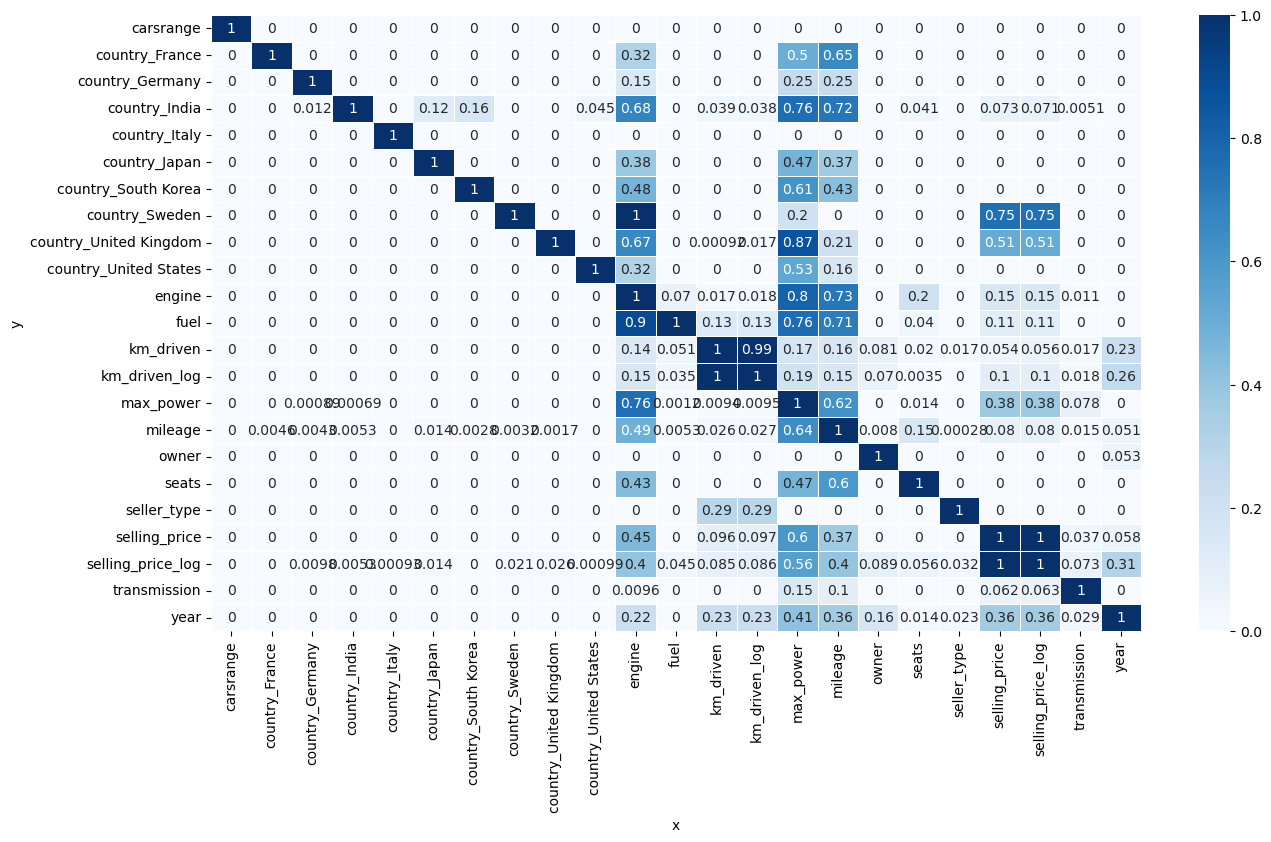

In [73]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
# dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

* it seem like the feature that matter to selling price log prediction is engine,max_power,mileage and year

In [74]:
# from sklearn.ensemble import ExtraTreesRegressor
# selection= ExtraTreesRegressor()
# selection.fit(X,y)

In [75]:
#plot graph of feature importances for better visualization

# plt.figure(figsize = (12,8))
# feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

### split data

In [76]:
# select only high pps
X = df[['engine','max_power','mileage','year']]
y = df["selling_price"]

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 96)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 3287 to 6312
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     5475 non-null   Int64  
 1   max_power  5479 non-null   float64
 2   mileage    5475 non-null   float64
 3   year       5619 non-null   int64  
dtypes: Int64(1), float64(2), int64(1)
memory usage: 225.0 KB


In [79]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price_log', 'km_driven_log', 'carsrange', 'country_France',
       'country_Germany', 'country_India', 'country_Italy', 'country_Japan',
       'country_South Korea', 'country_Sweden', 'country_United Kingdom',
       'country_United States'],
      dtype='object')

In [80]:
# what will happen if we use almost everything
# try create dataset that use everything that have pps more than 0.01
X = df.drop(columns=['carsrange','km_driven','selling_price','selling_price_log','country_France',
       'country_Germany', 'country_India', 'country_Italy','country_South Korea','country_United States'])
y = df["selling_price"]

X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X, y, test_size = 0.3, random_state = 96)

In [81]:
X_train_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 3287 to 6312
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    5619 non-null   int64  
 1   fuel                    5619 non-null   int64  
 2   seller_type             5619 non-null   int64  
 3   transmission            5619 non-null   int64  
 4   owner                   5619 non-null   int64  
 5   mileage                 5475 non-null   float64
 6   engine                  5475 non-null   Int64  
 7   max_power               5479 non-null   float64
 8   seats                   5475 non-null   float64
 9   km_driven_log           5619 non-null   float64
 10  country_Japan           5619 non-null   uint8  
 11  country_Sweden          5619 non-null   uint8  
 12  country_United Kingdom  5619 non-null   uint8  
dtypes: Int64(1), float64(4), int64(5), uint8(3)
memory usage: 504.8 KB


## Preprocessing

### fillna

#### high pps

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 3287 to 6312
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     5475 non-null   Int64  
 1   max_power  5479 non-null   float64
 2   mileage    5475 non-null   float64
 3   year       5619 non-null   int64  
dtypes: Int64(1), float64(2), int64(1)
memory usage: 225.0 KB


c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\ASUS\anaconda3\envs\torch\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


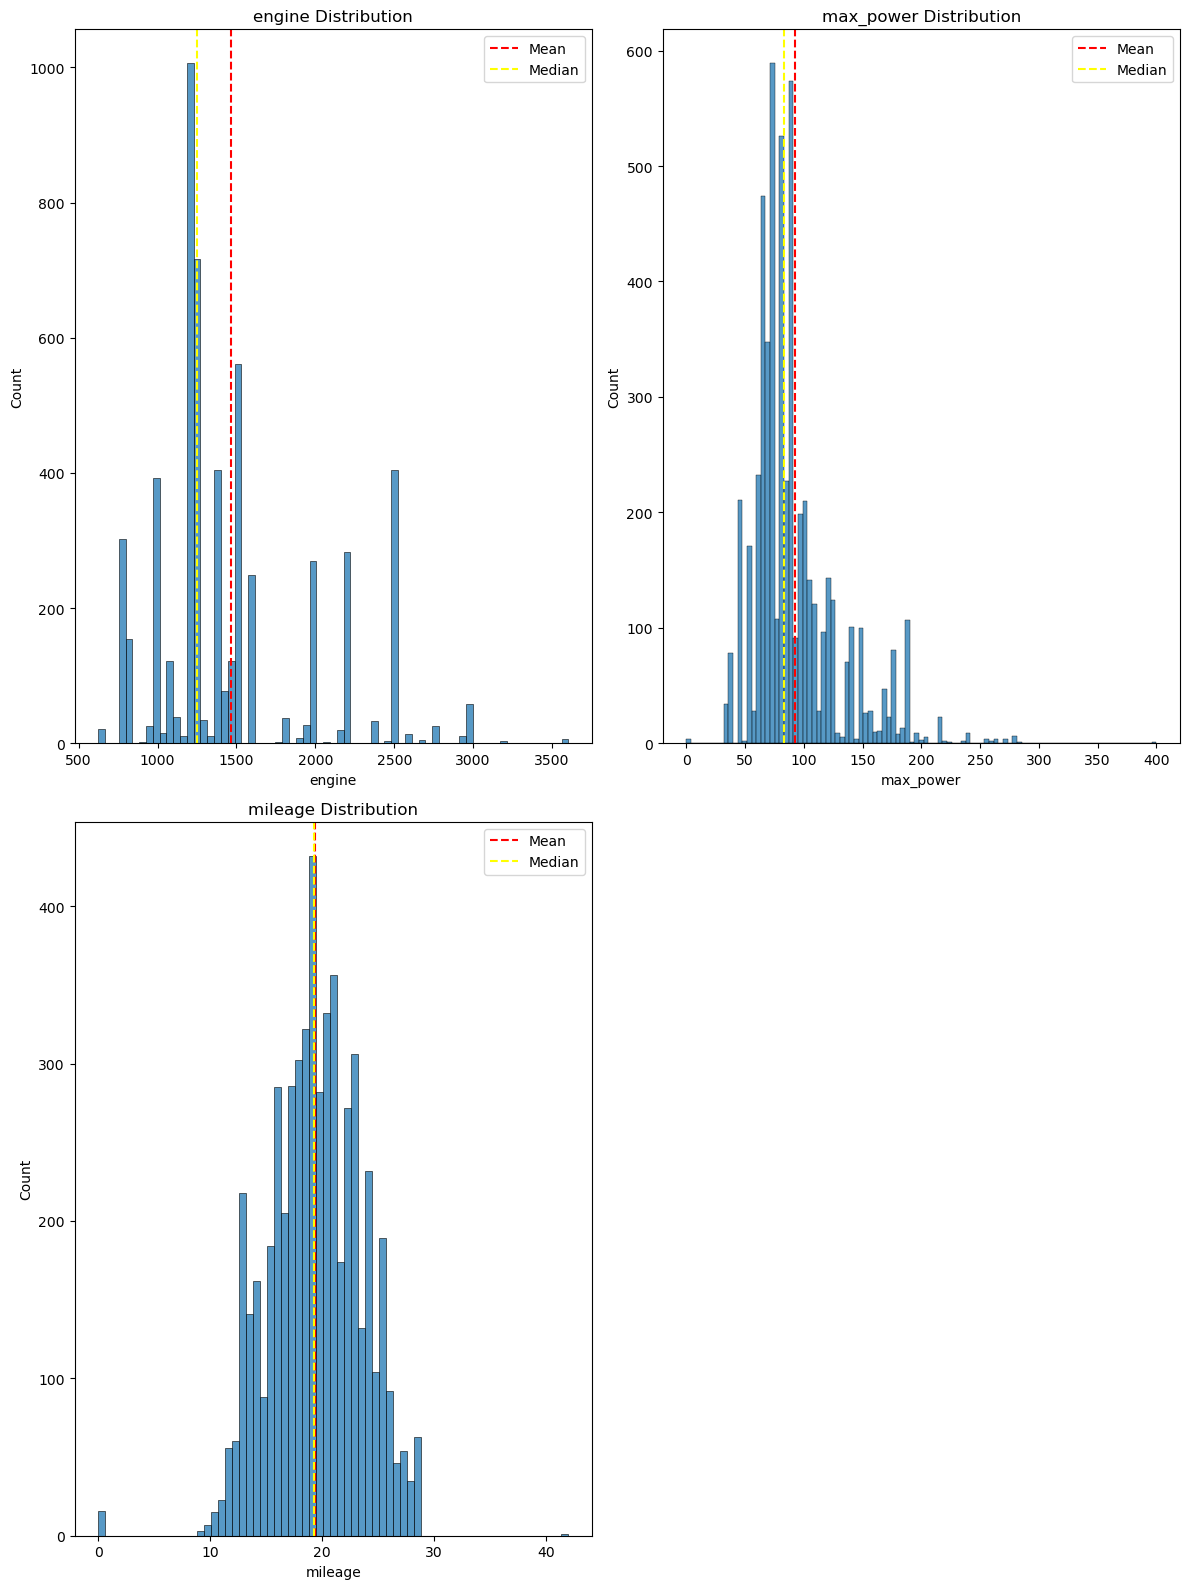

In [83]:
cols = ['engine','max_power','mileage']
displot_list(cols,X_train)

In [84]:
X_train['engine'].median(),X_train['engine'].mean()

(1248.0, 1467.4743378995433)

In [85]:
X_train['year'].median()

2015.0

In [86]:
X_train['mileage'].mean()

19.3737698630137

In [87]:
X_train['max_power'].mean()

92.3124958934112

In [88]:
X_test['engine'].median(),X_test['engine'].mean()

(1248.0, 1452.2415562206072)

In [89]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [90]:
X_train.isna().sum()

engine       0
max_power    0
mileage      0
year         0
dtype: int64

In [91]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)

In [92]:
X_test.isna().sum()

engine       0
max_power    0
mileage      0
year         0
dtype: int64

In [96]:
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)

In [97]:
Train.to_csv('datasets/car_train.csv', index=False)
Test.to_csv('datasets/car_test.csv', index=False)

In [ ]:
def outlier_count(col, data = df):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))
    
    return min_val,max_val

In [ ]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price_log', 'km_driven_log', 'carsrange', 'country_France',
       'country_Germany', 'country_India', 'country_Italy', 'country_Japan',
       'country_South Korea', 'country_Sweden', 'country_United Kingdom',
       'country_United States'],
      dtype='object')

In [ ]:
range_train = {}
for col in df.drop(columns=['engine','max_power','mileage','seats',"carsrange"]).columns:
    min_val,max_val = outlier_count(col,df)
    range_train[col]=(min_val,max_val)
    print("max: ",max_val)
    print("min: ",min_val)


---------------year---------------

Number of outliers: 78
Percent of data that is outlier: 0.97%
max:  2026.0
min:  2002.0

---------------selling_price---------------

Number of outliers: 595
Percent of data that is outlier: 7.41%
max:  1310000.0
min:  -370000.0

---------------km_driven---------------

Number of outliers: 168
Percent of data that is outlier: 2.09%
max:  192500.0
min:  -59500.0
max:  2.5
min:  -1.5

---------------seller_type---------------

Number of outliers: 1355
Percent of data that is outlier: 16.88%
max:  0.0
min:  0.0

---------------transmission---------------

Number of outliers: 1046
Percent of data that is outlier: 13.03%
max:  0.0
min:  0.0

---------------owner---------------

Number of outliers: 170
Percent of data that is outlier: 2.12%
max:  3.5
min:  -0.5

---------------selling_price_log---------------

Number of outliers: 360
Percent of data that is outlier: 4.48%
max:  14.871964827884227
min:  11.02632015926573

---------------km_driven_log------

In [ ]:
range_train = {}
for col in X_train.columns:
    min_val,max_val = outlier_count(col,X_train)
    range_train[col]=(min_val,max_val)
    print("max: ",max_val)
    print("min: ",min_val)


---------------engine---------------

Number of outliers: 848
Percent of data that is outlier: 15.09%
max:  2159.5
min:  619.5

---------------max_power---------------

Number of outliers: 435
Percent of data that is outlier: 7.74%
max:  151.5
min:  19.5

---------------mileage---------------

Number of outliers: 17
Percent of data that is outlier: 0.3%
max:  30.55
min:  8.55

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
max:  2024.5
min:  2004.5


#### big

In [ ]:
X_train_big.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 3287 to 6312
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    5619 non-null   int64  
 1   fuel                    5619 non-null   int64  
 2   seller_type             5619 non-null   int64  
 3   transmission            5619 non-null   int64  
 4   owner                   5619 non-null   int64  
 5   mileage                 5475 non-null   float64
 6   engine                  5475 non-null   Int64  
 7   max_power               5479 non-null   float64
 8   seats                   5475 non-null   float64
 9   km_driven_log           5619 non-null   float64
 10  country_Japan           5619 non-null   uint8  
 11  country_Sweden          5619 non-null   uint8  
 12  country_United Kingdom  5619 non-null   uint8  
dtypes: Int64(1), float64(4), int64(5), uint8(3)
memory usage: 504.8 KB


* missing data almost the same as high pps

In [ ]:
X_train_big.isna().sum()

year                        0
fuel                        0
seller_type                 0
transmission                0
owner                       0
mileage                   144
engine                    144
max_power                 140
seats                     144
km_driven_log               0
country_Japan               0
country_Sweden              0
country_United Kingdom      0
dtype: int64

In [ ]:
X_train_big['engine'].fillna(X_train_big['engine'].median(), inplace=True)
X_train_big['max_power'].fillna(X_train_big['max_power'].mean(), inplace=True)
X_train_big['mileage'].fillna(X_train_big['mileage'].mean(), inplace=True)

In [ ]:
X_train_big.isna().sum()

year                        0
fuel                        0
seller_type                 0
transmission                0
owner                       0
mileage                     0
engine                      0
max_power                   0
seats                     144
km_driven_log               0
country_Japan               0
country_Sweden              0
country_United Kingdom      0
dtype: int64

In [ ]:
X_train_big["seats"].value_counts()

5.0     4321
7.0      778
8.0      174
4.0       92
9.0       56
6.0       37
10.0      14
2.0        2
14.0       1
Name: seats, dtype: int64

In [ ]:
# fill ratio

def fill_ratio(mdisc_col,df):

    for col in mdisc_col:

        ratio = df[col].value_counts(normalize=True)

        missing = df[col].isna().sum()

        for k,v in ratio.items():

            num1 = max(int(np.round(v * missing)), 1)

            df[col].fillna(k, limit = num1, inplace=True)

    return df


In [ ]:
X_train_big = fill_ratio(['seats'],X_train_big)

In [ ]:
X_train_big["seats"].value_counts()

5.0     4435
7.0      798
8.0      179
4.0       94
9.0       57
6.0       38
10.0      15
2.0        2
14.0       1
Name: seats, dtype: int64

In [ ]:
X_train_big.isna().sum()

year                      0
fuel                      0
seller_type               0
transmission              0
owner                     0
mileage                   0
engine                    0
max_power                 0
seats                     0
km_driven_log             0
country_Japan             0
country_Sweden            0
country_United Kingdom    0
dtype: int64

In [ ]:
X_test_big.isna().sum()

year                       0
fuel                       0
seller_type                0
transmission               0
owner                      0
mileage                   70
engine                    70
max_power                 68
seats                     70
km_driven_log              0
country_Japan              0
country_Sweden             0
country_United Kingdom     0
dtype: int64

In [ ]:
X_test_big['engine'].fillna(X_test_big['engine'].median(), inplace=True)
X_test_big['max_power'].fillna(X_test_big['max_power'].mean(), inplace=True)
X_test_big['mileage'].fillna(X_test_big['mileage'].mean(), inplace=True)
X_test_big = fill_ratio(['seats'],X_test_big)

In [ ]:
X_train_big.isna().sum()

year                      0
fuel                      0
seller_type               0
transmission              0
owner                     0
mileage                   0
engine                    0
max_power                 0
seats                     0
km_driven_log             0
country_Japan             0
country_Sweden            0
country_United Kingdom    0
dtype: int64

### try create dataset with droped outlier

In [ ]:
combined_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
# Define a function to identify outliers
def remove_outliers_list( col2drop, range_dict,data):
    for col in col2drop:
        data = data[(data[col] >= range_dict[col][0]) & (data[col] <= range_dict[col][1])]
    return data

In [ ]:
# engine and max power is too huge to drop, i'm not sure what to do
col2drop = ["mileage","year"]
combined_data = remove_outliers_list( col2drop, range_train,combined_data)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 3287 to 6312
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   engine         5457 non-null   Int64  
 1   max_power      5457 non-null   float64
 2   mileage        5457 non-null   float64
 3   year           5457 non-null   int64  
 4   selling_price  5457 non-null   int64  
dtypes: Int64(1), float64(2), int64(2)
memory usage: 261.1 KB


In [ ]:
for col in X_train.columns:
    min_val,max_val = outlier_count(col,combined_data)


---------------engine---------------

Number of outliers: 834
Percent of data that is outlier: 15.28%

---------------max_power---------------

Number of outliers: 429
Percent of data that is outlier: 7.86%


In [ ]:
# def replace_with_thresholds(cols,dataframe):
#     for col in cols: 
#         up_limit = dataframe[col].quantile(.95)
#         low_limit = dataframe[col].quantile(.05)
#         try:
#             dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
#             dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
#         except:
#             dataframe.loc[(dataframe[col] < low_limit), col] = math.ceil(low_limit)
#             dataframe.loc[(dataframe[col] > up_limit), col] = math.floor(up_limit)
#     return dataframe


In [ ]:
# cols = ["engine","max_power"]
# combined_data = replace_with_thresholds(cols,range_train,combined_data)

In [ ]:
# x_train_no_outlier
# Separate x_train and y_train again
X_train_no_outlier = combined_data.drop(columns=['selling_price'])
y_train_no_outlier = combined_data['selling_price']

In [ ]:
X_train_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 3287 to 6312
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     5457 non-null   Int64  
 1   max_power  5457 non-null   float64
 2   mileage    5457 non-null   float64
 3   year       5457 non-null   int64  
dtypes: Int64(1), float64(2), int64(1)
memory usage: 218.5 KB


## scaling & train 


* ### Linear Regression:  
    - Advantages: Simple and interpretable, works well when there's a linear relationship between features and target.  
    - Disadvantages: Limited to linear patterns, sensitive to outliers.  
    - Main Idea: Fits a straight line to data points, minimizing the sum of squared differences between predicted and actual values.  
    
    
* ### SVR:   
    - Advantages: Can capture non-linear relationships using kernel functions, effective with high-dimensional data.
    - Disadvantages: Sensitive to choice of kernel and hyperparameters, may be slower with large datasets.  
    - Main Idea: Maps data into a higher-dimensional space to find a hyperplane that maximizes the margin around predicted values.  
    
  
* ### KNeighbors Regressor:  
    - Advantages: Simple and intuitive, adapts to local data variations.  
    - Disadvantages: Prone to noisy data, performance may degrade with high-dimensional data.  
    - Main Idea: Predicts by averaging target values of k nearest data points.  
    
  
* ### Decision-Tree Regressor:  
    - Advantages: Captures complex relationships, handles both numerical and categorical data.  
    - Disadvantages: Prone to overfitting, sensitive to small variations in data.  
    - Main Idea: Builds a tree by recursively splitting data based on feature conditions to predict target values.  
    
  
* ### Random-Forest Regressor:
    - Advantages: Reduces overfitting through ensemble of decision trees, handles high-dimensional data well.  
    - Disadvantages: Less interpretable than single decision trees, can be computationally expensive.  
    - Main Idea: Constructs multiple decision trees and averages their predictions to improve accuracy and generalization.  
        

In [ ]:
# removed outlier use the same test dataset as high_pps
datasets = {"high_pps":[X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()],
        "removed_outlier":[X_train_no_outlier.copy(),y_train_no_outlier.copy(),X_test.copy(),y_test.copy()],
        "big_dataset":[X_train_big.copy(),y_train_big.copy(),X_test_big.copy(),y_test_big.copy()]}

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle
import os

from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score

log_y = True 

for test_name,dl in datasets.items():

    print('-'*25,test_name,'-'*25)
    scaler = StandardScaler()
    dl[0] = scaler.fit_transform(dl[0])
    dl[2]  = scaler.transform(dl[2])


    model_path = f"models/{test_name}/"

    if not os.path.exists(model_path):
        os.makedirs(model_path)

    with open(model_path+"scaler.pkl", 'wb') as file:
        pickle.dump(scaler, file)

    print("train ex:\n",dl[0][:3])
    print("x train shape: ",dl[0].shape)
    print("y train shape: ",dl[1].shape)
    print("test ex:\n",dl[2][:3])
    print("x test shape: ",dl[2].shape)
    print("y test shape: ",dl[3].shape)
    print("-"*50)

    if log_y:
        dl[1] = np.log(dl[1])
        print("y log sample:\n",dl[1][:3])
        print("-"*50)

    # models that we will be using, put them in a list
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 2), 
                RandomForestRegressor(n_estimators = 100, random_state = 0)]

    # The names of the models
    algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

    #lists for keeping mse
    train_mse = []
    test_mse = []

    #defining splits
    kfold = KFold(n_splits=5, shuffle=True)

    for i, model in enumerate(algorithms):
        scores = cross_val_score(model, dl[0], dl[1], cv=kfold, scoring='neg_mean_squared_error')
        print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")
    print("="*100,"\n\n")


    
        
    


------------------------- high_pps -------------------------
train ex:
 [[ 1.41960456  1.32206628 -1.06657058  0.03552753]
 [-0.42331738 -0.50768716  1.00479407  0.03552753]
 [-0.91621487 -0.70175191  0.90746488  0.789794  ]]
x train shape:  (5619, 4)
y train shape:  (5619,)
test ex:
 [[ 0.06958011 -0.39679301 -0.41770936 -1.97584971]
 [ 1.04745705  1.54108222 -0.31788456 -0.71873894]
 [ 1.41960456  0.76759554 -1.82773469 -1.22158325]]
x test shape:  (2409, 4)
y test shape:  (2409,)
--------------------------------------------------
y log sample:
 3287    13.815511
7110    13.005830
2469    12.487485
Name: selling_price, dtype: float64
--------------------------------------------------
Linear Regression - Score: [-0.10172848 -0.11373999 -0.10379412 -0.0995117  -0.09513277]; Mean: -0.1027814136425211


SVR - Score: [-0.0720635  -0.07490921 -0.06742166 -0.0796701  -0.0845874 ]; Mean: -0.0757303742741757
KNeighbors Regressor - Score: [-0.05615006 -0.0637359  -0.06417359 -0.06251515 -0.05673571]; Mean: -0.06066208170084184
Decision-Tree Regressor - Score: [-0.05753717 -0.07154837 -0.06382027 -0.06194273 -0.06453857]; Mean: -0.06387742115700208
Random-Forest Regressor - Score: [-0.05365637 -0.04797186 -0.05484634 -0.04496633 -0.05629398]; Mean: -0.05154697586495135


------------------------- removed_outlier -------------------------
train ex:
 [[ 1.4103068   1.31717205 -1.13574512 -0.05299426]
 [-0.43613724 -0.52610546  1.00916215 -0.05299426]
 [-0.92997673 -0.72160459  0.90837735  0.80940041]]
x train shape:  (5457, 4)
y train shape:  (5457,)
test ex:
 [[ 0.05770225 -0.41439167 -0.46384646 -2.35271339]
 [ 1.03744807  1.53780678 -0.36047744 -0.91538893]
 [ 1.4103068   0.7586031  -1.92393394 -1.49031871]]
x test shape:  (2409, 4)
y test shape:  (2409,)
-----------------------------------

* all test show Random-Forest Regressor have best score

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

models = {}
test_search = ['high_pps', 'removed_outlier', 'big_dataset']

for test_name in test_search:
    param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'n_estimators': [75,100,200]}

    rf = RandomForestRegressor(random_state = 1)

    grid = GridSearchCV(estimator = rf, 
                        param_grid = param_grid, 
                        cv = kfold, 
                        n_jobs = -1, 
                        return_train_score=True, 
                        refit=True,
                        scoring='neg_mean_squared_error')

    # Fit your grid_search
    grid.fit(datasets[test_name][0], datasets[test_name][1]);  #fit means start looping all the possible parameters

    models[test_name] = grid

In [ ]:
for test_name,model in models.items():
    print("-"*20,test_name,"-"*20)
    print(f"best params: {model.best_params_}")
    print(f"best score: {model.best_score_}")
    print("="*50,"\n")


-------------------- high_pps --------------------
best params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
best score: -0.0511471344302558

-------------------- removed_outlier --------------------
best params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
best score: -0.045853687235091665

-------------------- big_dataset --------------------
best params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
best score: -0.04822651639917117



## Test

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

for test_name,dl in datasets.items():

    print("-"*20,test_name,"-"*20)

    yhat = models[test_name].best_estimator_.predict(dl[2])
    yhat = np.exp(yhat)

    print("MSE: ", mean_squared_error(dl[3], yhat))
    print("r2: ", r2_score(dl[3], yhat))
    print('='*50,"\n")


-------------------- high_pps --------------------
MSE:  16292882042.593023
r2:  0.9718450985790483

-------------------- removed_outlier --------------------
MSE:  15797731454.433102
r2:  0.9727007431459042

-------------------- big_dataset --------------------
MSE:  16447662384.808231
r2:  0.9715776305359127



* use many feature get so little improve
* remove outlier is the best

### feature importance 

#### shap plot

In [ ]:
datasets.keys()

dict_keys(['high_pps', 'removed_outlier', 'big_dataset'])

In [ ]:
best_models = models['removed_outlier'].best_estimator_

In [ ]:
import shap

explainer = shap.TreeExplainer(best_models)
shap_values = explainer.shap_values(X_test)

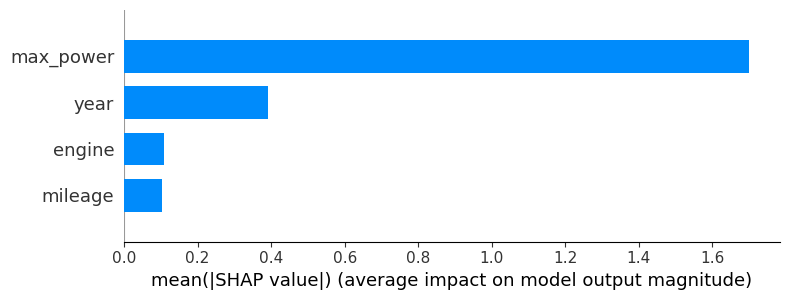

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X_test.columns)

In [ ]:
best_models = models['big_dataset'].best_estimator_
explainer = shap.TreeExplainer(best_models)
shap_values = explainer.shap_values(X_test_big)

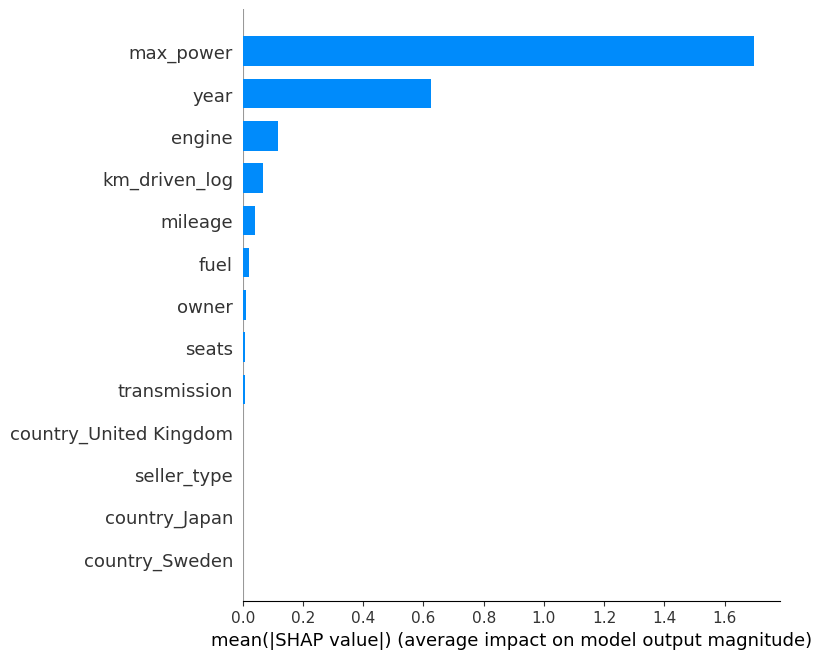

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test_big, plot_type="bar", feature_names = X_test_big.columns)

* so actually all country and seller type have no prefiction power
* found out km driven is also fine feature

## inference

In [ ]:
import pickle

for test_name,model in models.items():

    # save the model to disk
    model_path = f"models/{test_name}/"
    filename = model_path + 'car_price.model'
    pickle.dump(model.best_estimator_, open(filename, 'wb'))


In [ ]:
# load the model from disk
loaded_model = pickle.load(open("models/removed_outlier/car_price.model", 'rb'))

In [ ]:
loaded_model

RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=1)

In [ ]:
# 'engine','max_power','mileage','year'

sample = np.array([[int(1400), float(100),float(20), int(2014)]])

In [ ]:
with open("models/removed_outlier/scaler.pkl", 'rb') as file:
    loaded_scaler = pickle.load(file)

In [ ]:
sample_scaled = loaded_scaler.transform(sample)
predicted = loaded_model.predict(sample_scaled)

print(round(np.exp(predicted[0])))

451924


X does not have valid feature names, but StandardScaler was fitted with feature names


https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114  
https://medium.com/@sedefftaskin92/feature-engineering-data-pre-processing-outliers-e072f7bdcc63  
https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8  

## summerlize    
* Which features are important? Which are not? Why?  

importance feature

1. Max Power: Max power indicates the engine's performance, influencing a car's speed and acceleration. More powerful engines often lead to higher-priced cars  

2. Year: Newer cars usually have advanced features, better safety, and improved efficiency, it may also relate to inflation.

3. Engine: Engine size affects power and efficiency. Larger engines typically have more power but can consume more fuel.

4. mileage:I don't know about this, but it's pps score a bit high. 


Not very importance feature

1. brand: actully I think brand is impportance, but I don't have much knowledge in this, and some brand also sell both highend and budget car so I don't think i can estimate the car price much. 

2. Kilometers Driven: Higher kilometers driven generally indicate more wear on the car's components. but when ploting it seem not related to selling price much.

3. seats: car with many seats doesn't mean it expensive. the seats number maybe depend on design and usability.

* Which algorithm performs well? Which does not? Why?  

the results show random forrest is the best for all 3 training set. I think its because random forrest is more complex algorithm than the other. In the other hand, linear regression always the worst. maybe because it good only at capture linear relation and some data is not have much linear relation. 
For SVR, it seem better when we used many feature. oposite to KNeighbors and Decision-Tree Regressor which worse when use many feature.


